In [1]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import stats


In [2]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
import os

In [4]:
# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.preprocessing import scale


In [5]:
# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from kneed import KneeLocator
from matplotlib import cm
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud, STOPWORDS
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.cluster import KElbowVisualizer

/Users/fakhruddinhussain/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/style/colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/Users/fakhruddinhussain/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/fakhruddinhussain/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/style/rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/Users/fakhruddinhussain/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [6]:
import nltk

In [8]:
# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 30,
    'figure.dpi': 200,
    'figure.figsize': [20, 5]
}
plt.rcParams.update(params)

/Users/fakhruddinhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/fakhruddinhussain/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [9]:
# Center all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

In [10]:
order = pd.read_csv('/Users/fakhruddinhussain/Desktop/main data/order_export.csv')
customer=pd.read_csv('/Users/fakhruddinhussain/Desktop/main data/customer_export.csv')
pd.set_option('display.max_columns', None)
customer.drop(['Zip'], axis=1,inplace=True)
order.drop(['Shipping_Zip'],axis=1,inplace=True)

In [547]:
customer.head()

Email Accepts_Email_Marketing         City  \
0              ki@gmail.com                     yes    Bengaluru   
1  pratapthomas99@gmail.com                     yes  Thiru Nagar   
2            test@vajro.com                      no      Madurai   
3              te@gmail.com                     yes     Namakkal   
4              kk@gmail.com                     yes          NaN   

                      Province Accepts_SMS_Marketing  Total_Spent  \
0                    Karnataka                    no          0.0   
1                   Tamil Nadu                    no          0.0   
2  Andaman and Nicobar Islands                    no          0.0   
3                   Tamil Nadu                    no          0.0   
4                          NaN                    no          0.0   

   Total_Orders  
0             0  
1             0  
2             0  
3             0  
4             0

In [12]:
customer.isnull().sum()

Email                        0
Accepts_Email_Marketing      0
City                       861
Province                   862
Accepts_SMS_Marketing        0
Total_Spent                  0
Total_Orders                 0
dtype: int64

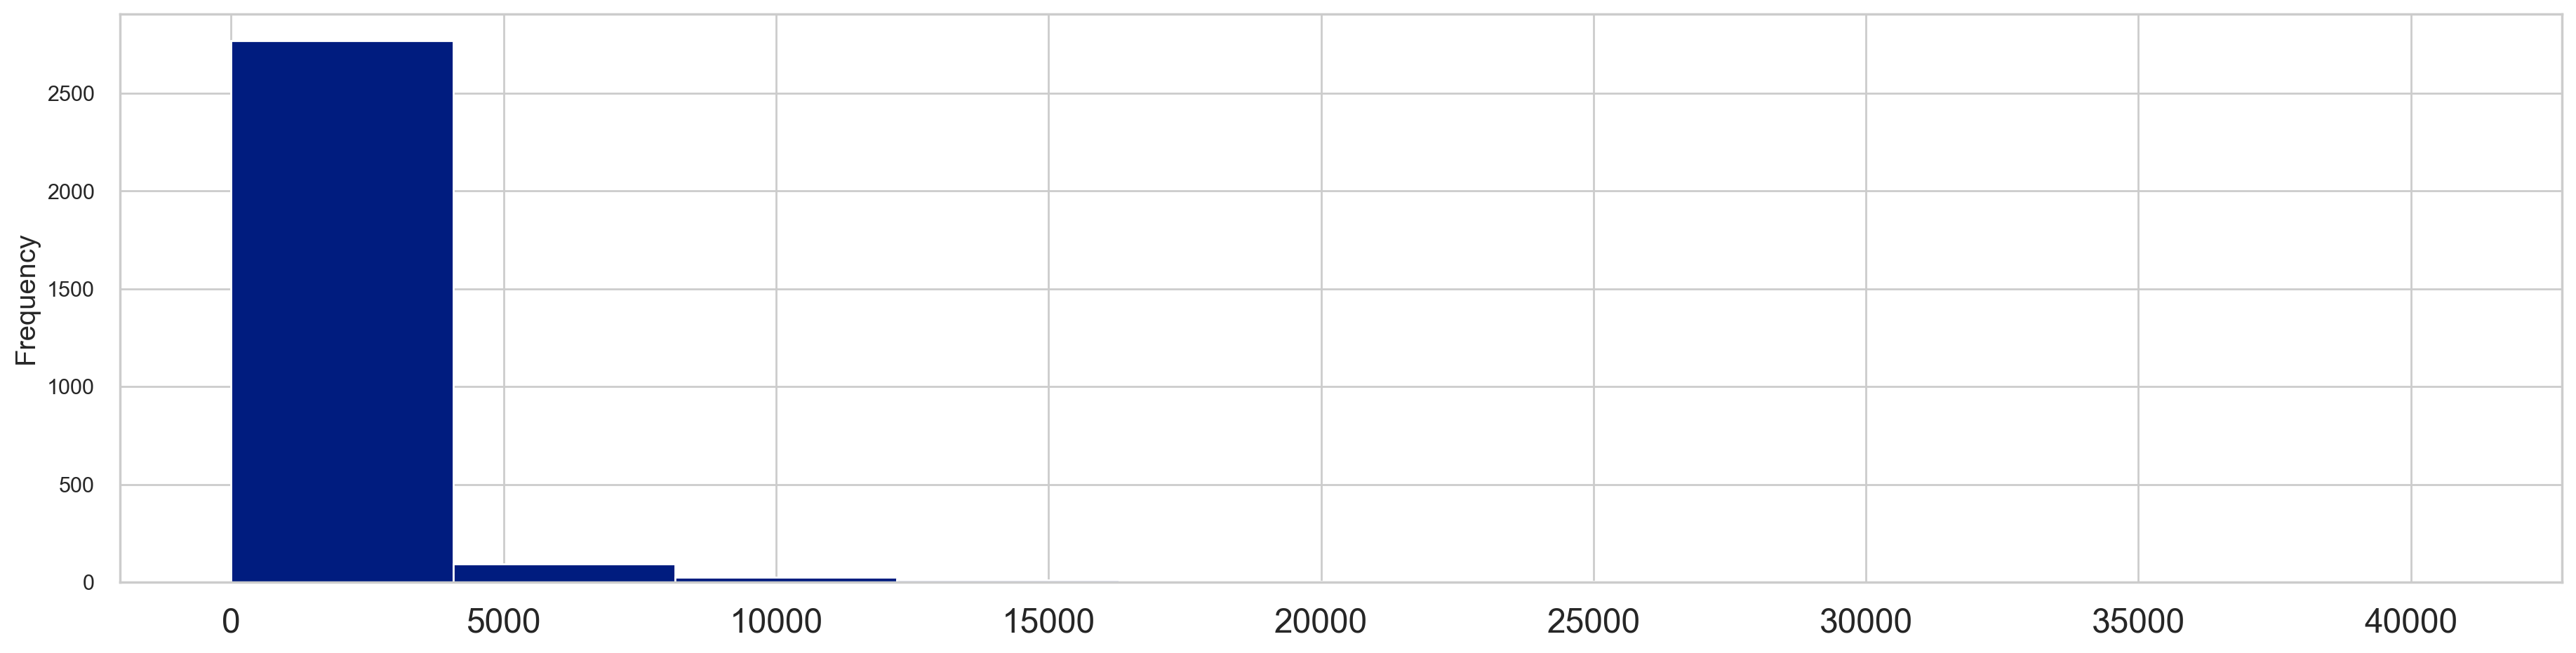

In [13]:
customer.Total_Spent.plot(kind='hist')
plt.show()

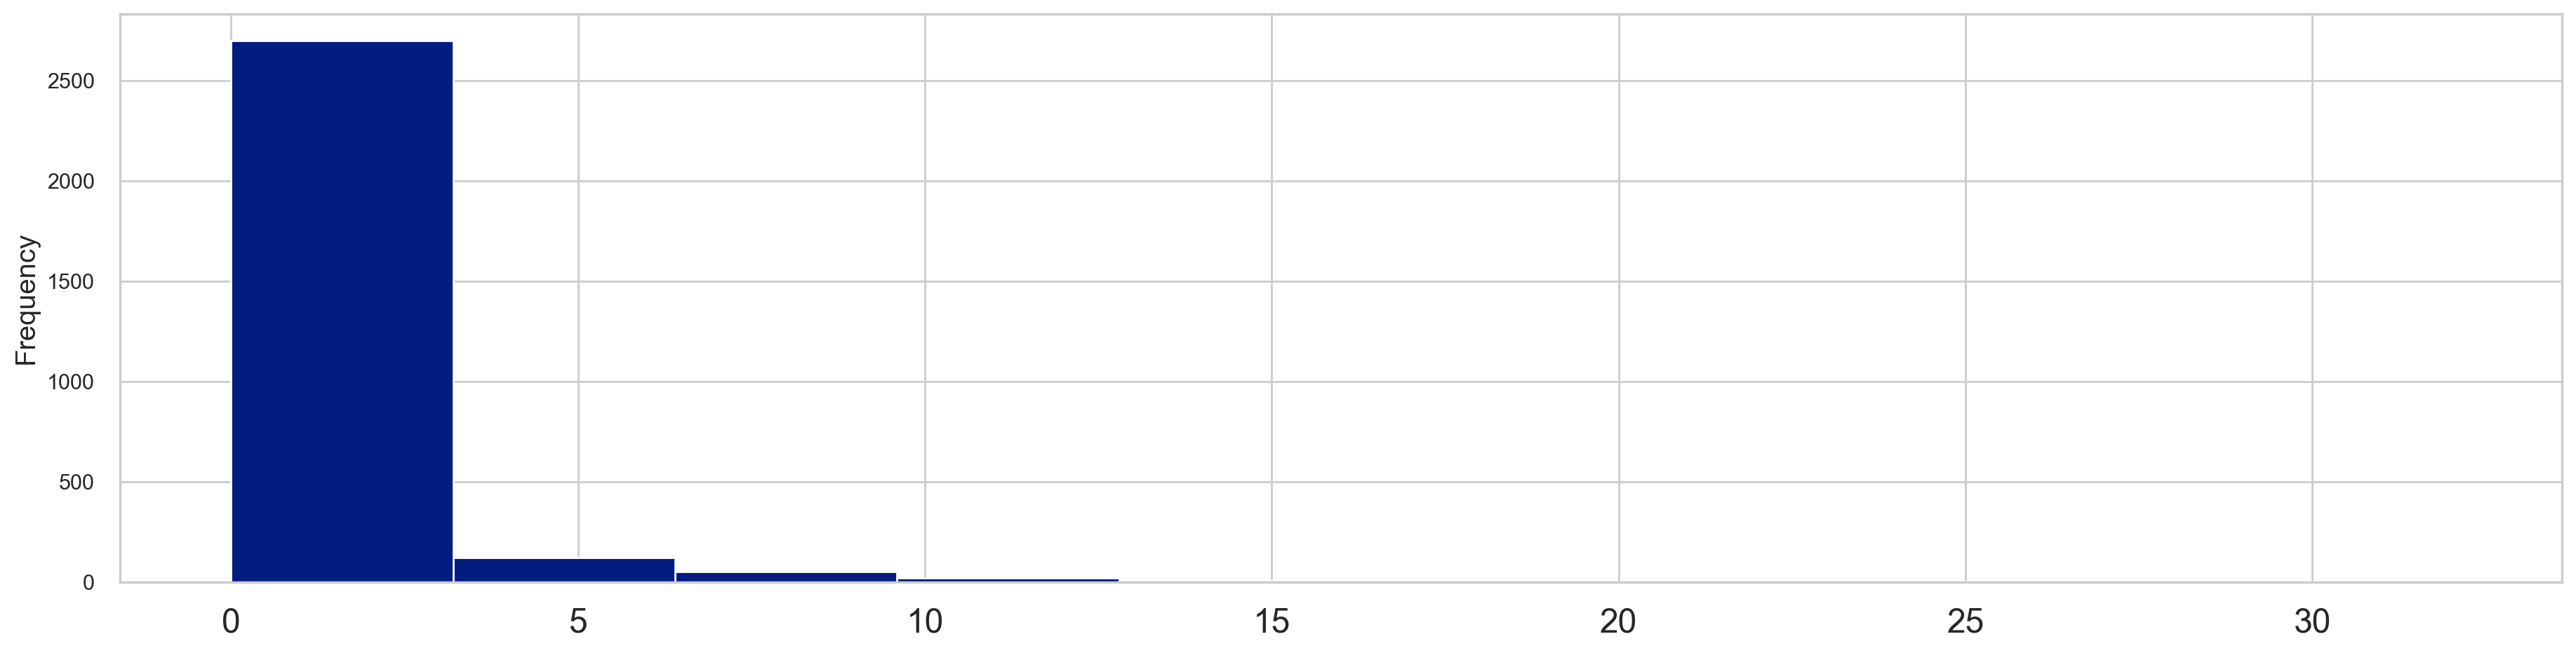

In [14]:
customer.Total_Orders.plot(kind='hist')
plt.show()

The Graph shows that most of the cutomers have a total number of orders between 0-5 orders

Maximum number of customers have spent between 0-5000 INR in total.

In [15]:
city_spent=customer.groupby(['City'])['Total_Spent'].agg(np.sum).reset_index().sort_values(by='Total_Spent',ascending=False)
city_spent.head(15)

City  Total_Spent
16      Bengaluru    564051.60
72        Madurai    516852.00
28     Coimbatore    268601.10
25        Chennai    213569.70
110         Salem    187565.00
140        Trichy    104435.00
97       Pollachi     96895.00
131         Theni     70403.50
139      Tiruppur     56486.00
29         Cumbum     36848.00
48          Hosur     33701.00
37          Erode     32394.10
166      sivakasi     31274.10
58          Karur     29081.26
160  Virudhunagar     28678.00

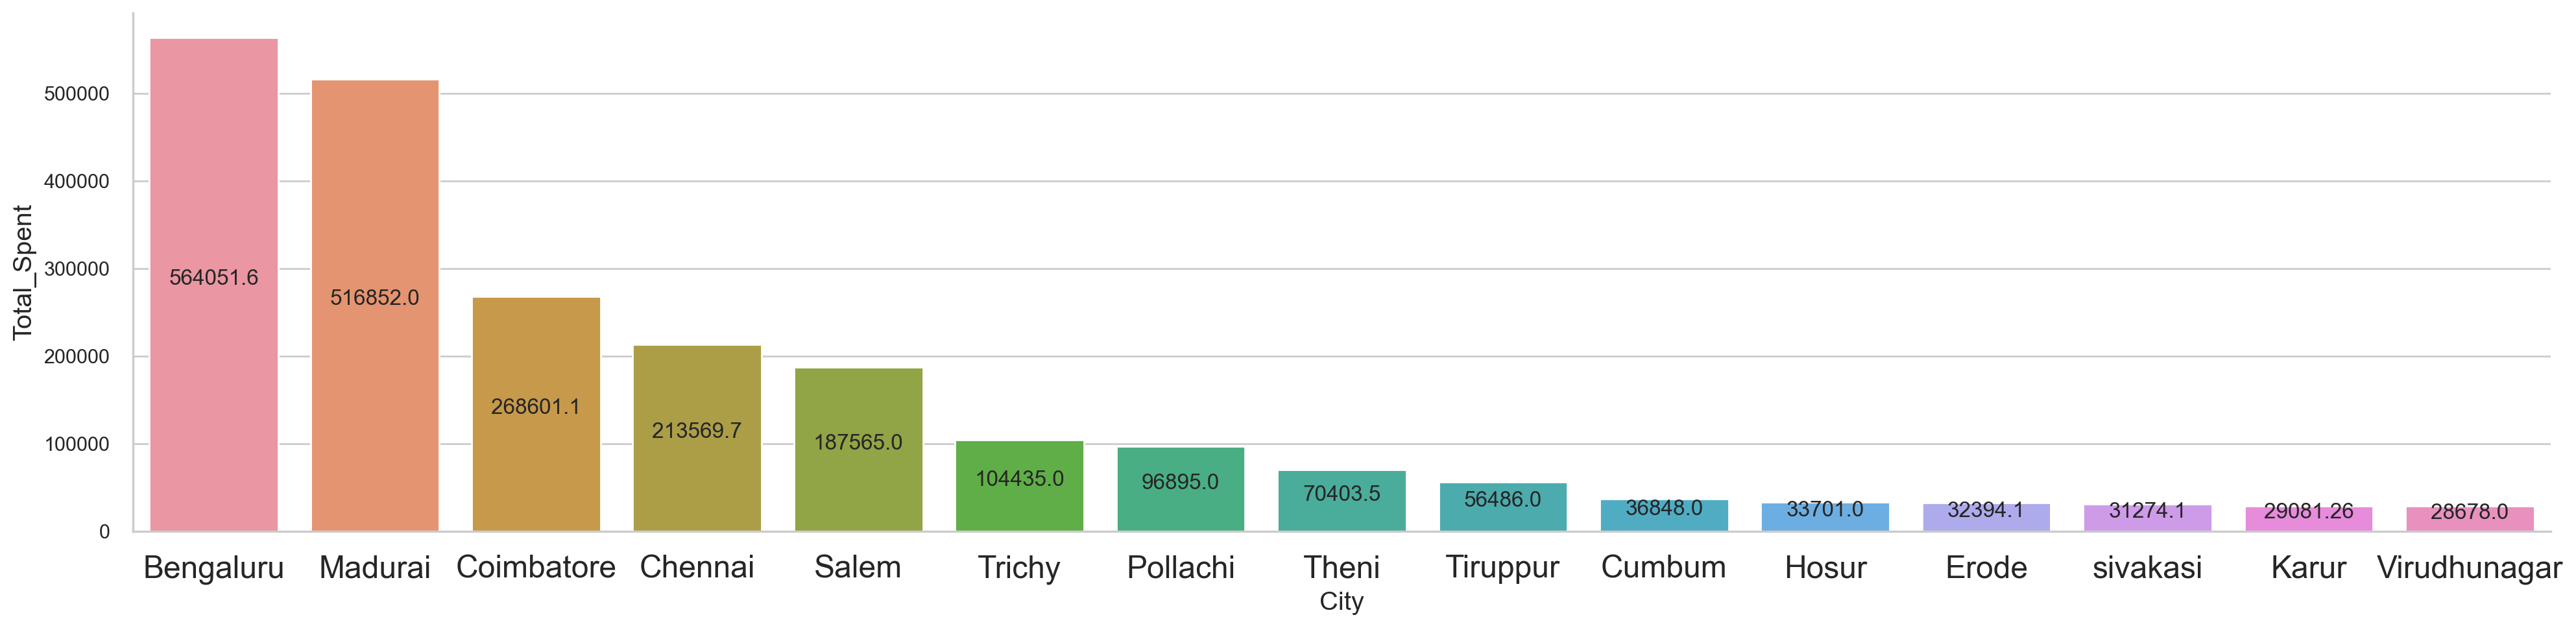

In [16]:
indexes=list(city_spent.head(15).City)
values=list(city_spent.head(15).Total_Spent)
sns.factorplot(x='City',y='Total_Spent', data=city_spent.head(15) , kind='bar',aspect=4 )
for i in range(len(indexes)):
    plt.text(i,values[i]//2,values[i],ha='center')
plt.show()

The Graph shows the amount of total sales value of top 15 cities which Bengluru, Madurai generates the highest amount of revenue in terms of total sales.

In [17]:
province_order=customer.groupby(['Province'])['Total_Orders'].agg(np.sum).reset_index().sort_values(by='Total_Orders',ascending=False)
province_order.head()

Province  Total_Orders
11                   Tamil Nadu          2373
6                     Karnataka           682
10                   Puducherry            35
0   Andaman and Nicobar Islands             6
9                        Odisha             1

In [18]:
province_spent=customer.groupby(['Province'])['Total_Spent'].agg(np.sum).reset_index().sort_values(by='Total_Spent',ascending=False)
province_spent.head()

Province  Total_Spent
11                   Tamil Nadu   1926697.00
6                     Karnataka    575859.10
10                   Puducherry     26118.00
0   Andaman and Nicobar Islands     25928.76
9                        Odisha      1325.00

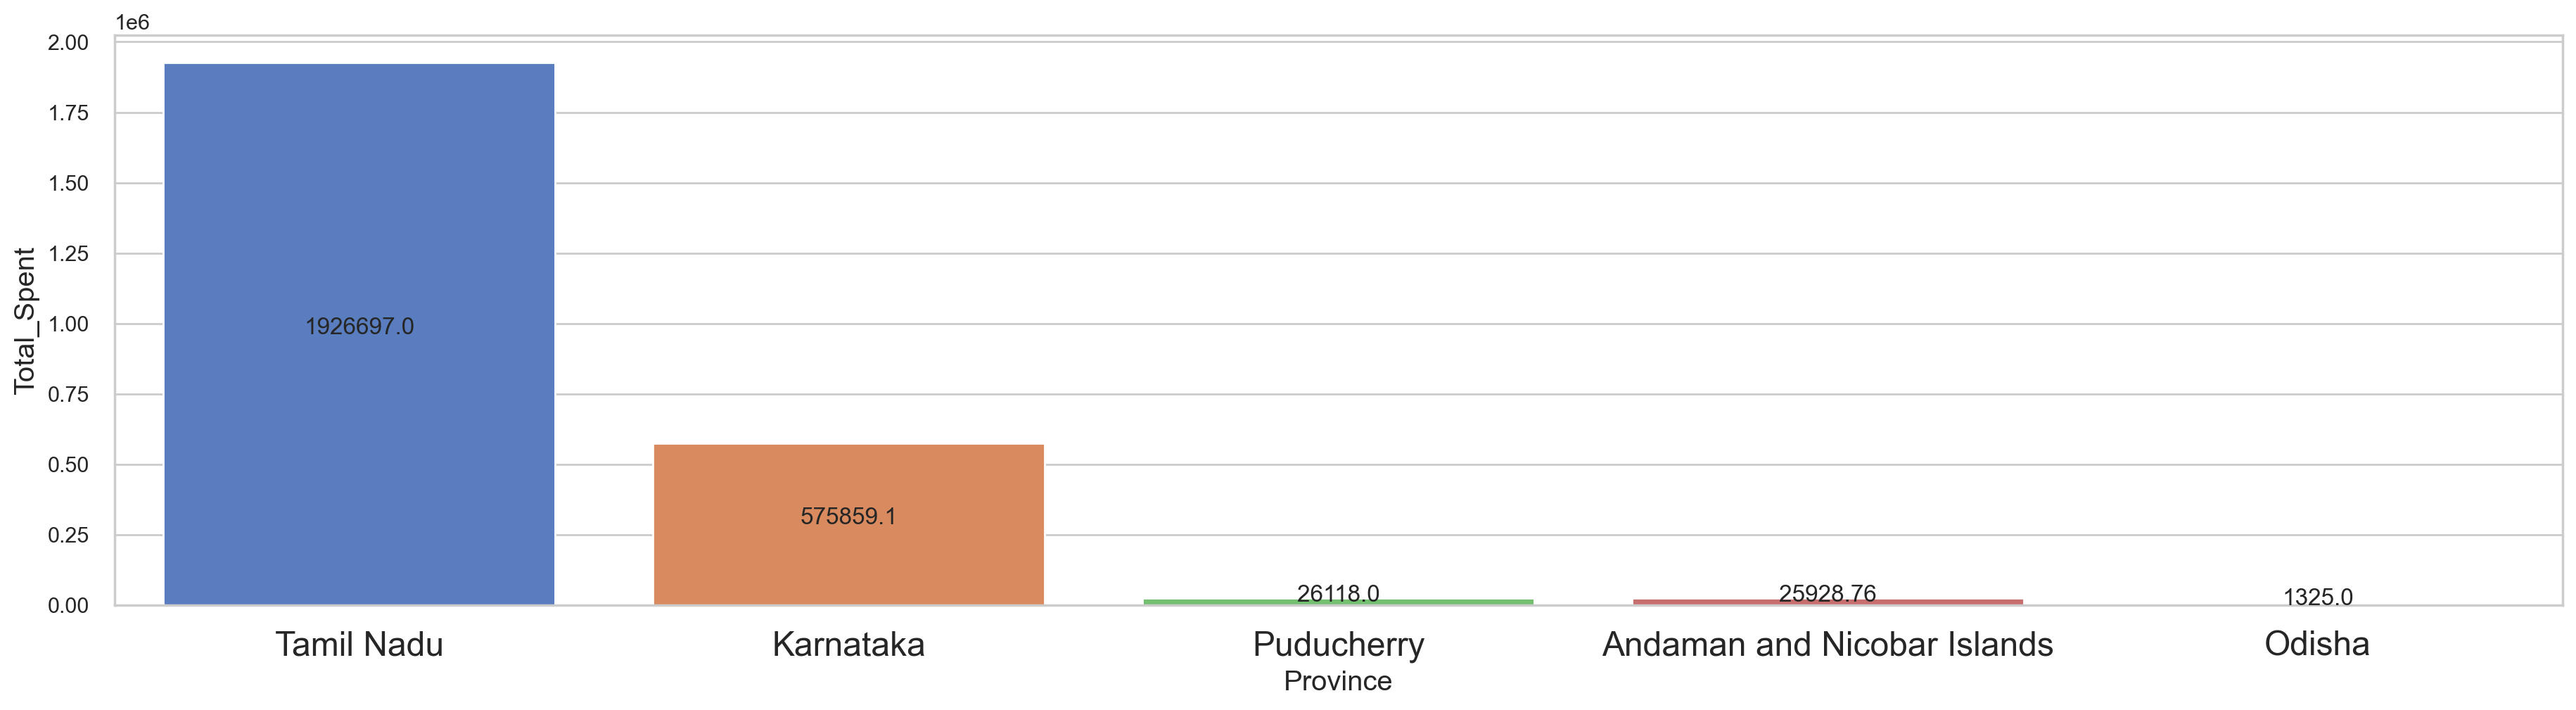

In [19]:
indexes=list(province_spent.head().Province)
values=list(province_spent.head().Total_Spent)
sns.barplot(x='Province',y='Total_Spent', data=province_spent.head(),palette='muted')
for i in range(len(indexes)):
    plt.text(i,values[i]//2,values[i],ha='center')
plt.show()

The Graph shows the amount of total sales value of the top provinces, Tamil nadu single handedly generates the highest amount of revenue in terms of total sales.

In [20]:
order.head()

Name                       Email Accepts_Marketing Financial_Status  \
0  #FSK4100       tamilanazad@gmail.com               yes             paid   
1  #FSK4099  rijeshmdevadasan@gmail.com               yes             paid   
2  #FSK4098  rijeshmdevadasan@gmail.com               yes             paid   
3  #FSK4097      s.krishnanlp@gmail.com               yes             paid   
4  #FSK4096        ndsemily66@gmail.com               yes             paid   

  Fulfillment_Status Fulfilled_at  Subtotal  Shipping   Total Discount_Code  \
0        unfulfilled          NaN     300.0       0.0   300.0           NaN   
1        unfulfilled          NaN     165.0      49.0   214.0           NaN   
2        unfulfilled          NaN     550.0       0.0   550.0           NaN   
3        unfulfilled          NaN     165.0      49.0   214.0           NaN   
4        unfulfilled          NaN    1275.0       0.0  1275.0           NaN   

   Discount_Amount    Shipping_Method Date_created Time_created Day_created  \
0              0.0      Free Shipping     04/09/22   7:31:19 PM      Sunday   
1              0.0  Standard Shipping     04/09/22   4:37:56 PM      Sunday   
2              0.0      Free Shipping     04/09/22   3:29:29 PM      Sunday   
3              0.0  Standard Shipping     04/09/22   3:01:16 PM      Sunday   
4              0.0      Free Shipping     04/09/22  11:39:32 AM      Sunday   

                                       Lineitem_name  \
0  Emperor Fish (Medium Size) | Vilai Meen - 500 ...   
1                Sardine (Keeri) - 500 gms / Cleaned   
2                             Blue crab meat - 500 g   
3              Sardine (Chaalai) - 500 gms / Cleaned   
4         Lady Finger | Kilangan - 500 gms / Cleaned   

                                 Fish_name Fish_packsize  \
0  Emperor Fish (Medium Size) | Vilai Meen       500 gms   
1                          Sardine (Keeri)       500 gms   
2                           Blue crab meat       500 gms   
3                        Sardine (Chaalai)       500 gms   
4                   Lady Finger | Kilangan       500 gms   

                        Fish_cut  Lineitem_quantity  Lineitem_price  \
0  Cleaned and Cut (Thin Slices)                  1             300   
1                        Cleaned                  1             165   
2                            NaN                  1             550   
3                        Cleaned                  1             165   
4                        Cleaned                  1             350   

   Lineitem_compare_at_price  Lineitem_total Lineitem_fulfillment_status  \
0                        NaN             300                     pending   
1                        NaN             165                     pending   
2                        NaN             550                     pending   
3                        NaN             165                     pending   
4                        NaN             350                     pending   

  Shipping_City Shipping_Province_Name Cancelled_at   Payment_Method  \
0       Madurai             Tamil Nadu          NaN  Razorpay Secure   
1   Tirunelveli             Tamil Nadu          NaN  Razorpay Secure   
2   Tirunelveli             Tamil Nadu          NaN  Razorpay Secure   
3     Bengaluru              Karnataka          NaN  Razorpay Secure   
4     Bengaluru              Karnataka          NaN  Razorpay Secure   

  Giftcard_used  Refunded_Amount  Outstanding_Balance Source Device_used  \
0            No              0.0                  0.0    web      iphone   
1            No              0.0                  0.0    web      iphone   
2            No              0.0                  0.0    web         NaN   
3            No              0.0                  0.0    web      iphone   
4            No              0.0                  0.0    web         NaN   

  vajro_mobile_app_used  
0                   yes  
1                   yes  
2                    no  
3           

In [21]:
order.isnull().sum()

Name                              0
Email                             0
Accepts_Marketing                 0
Financial_Status                  0
Fulfillment_Status                0
Fulfilled_at                    151
Subtotal                       2559
Shipping                       2559
Total                          2559
Discount_Code                  5448
Discount_Amount                2559
Shipping_Method                 358
Date_created                      0
Time_created                      0
Day_created                       0
Lineitem_name                     0
Fish_name                         0
Fish_packsize                     4
Fish_cut                        878
Lineitem_quantity                 0
Lineitem_price                    0
Lineitem_compare_at_price      4936
Lineitem_total                    0
Lineitem_fulfillment_status       0
Shipping_City                     0
Shipping_Province_Name            0
Cancelled_at                   5581
Payment_Method              

In [22]:
colums=['Cancelled_at','Fish_packsize','Fish_cut','Fulfilled_at','Discount_Code','Shipping_Method','Lineitem_compare_at_price','Payment_Method','Device_used']
for i in colums:
    order[i].fillna('na', inplace=True)
colums_1=['Subtotal','Total','Discount_Amount','Refunded_Amount','Outstanding_Balance','Shipping']
for i in colums_1:
    order[i].fillna(0,inplace=True)

In [23]:
order.isnull().sum()

Name                           0
Email                          0
Accepts_Marketing              0
Financial_Status               0
Fulfillment_Status             0
Fulfilled_at                   0
Subtotal                       0
Shipping                       0
Total                          0
Discount_Code                  0
Discount_Amount                0
Shipping_Method                0
Date_created                   0
Time_created                   0
Day_created                    0
Lineitem_name                  0
Fish_name                      0
Fish_packsize                  0
Fish_cut                       0
Lineitem_quantity              0
Lineitem_price                 0
Lineitem_compare_at_price      0
Lineitem_total                 0
Lineitem_fulfillment_status    0
Shipping_City                  0
Shipping_Province_Name         0
Cancelled_at                   0
Payment_Method                 0
Giftcard_used                  0
Refunded_Amount                0
Outstandin

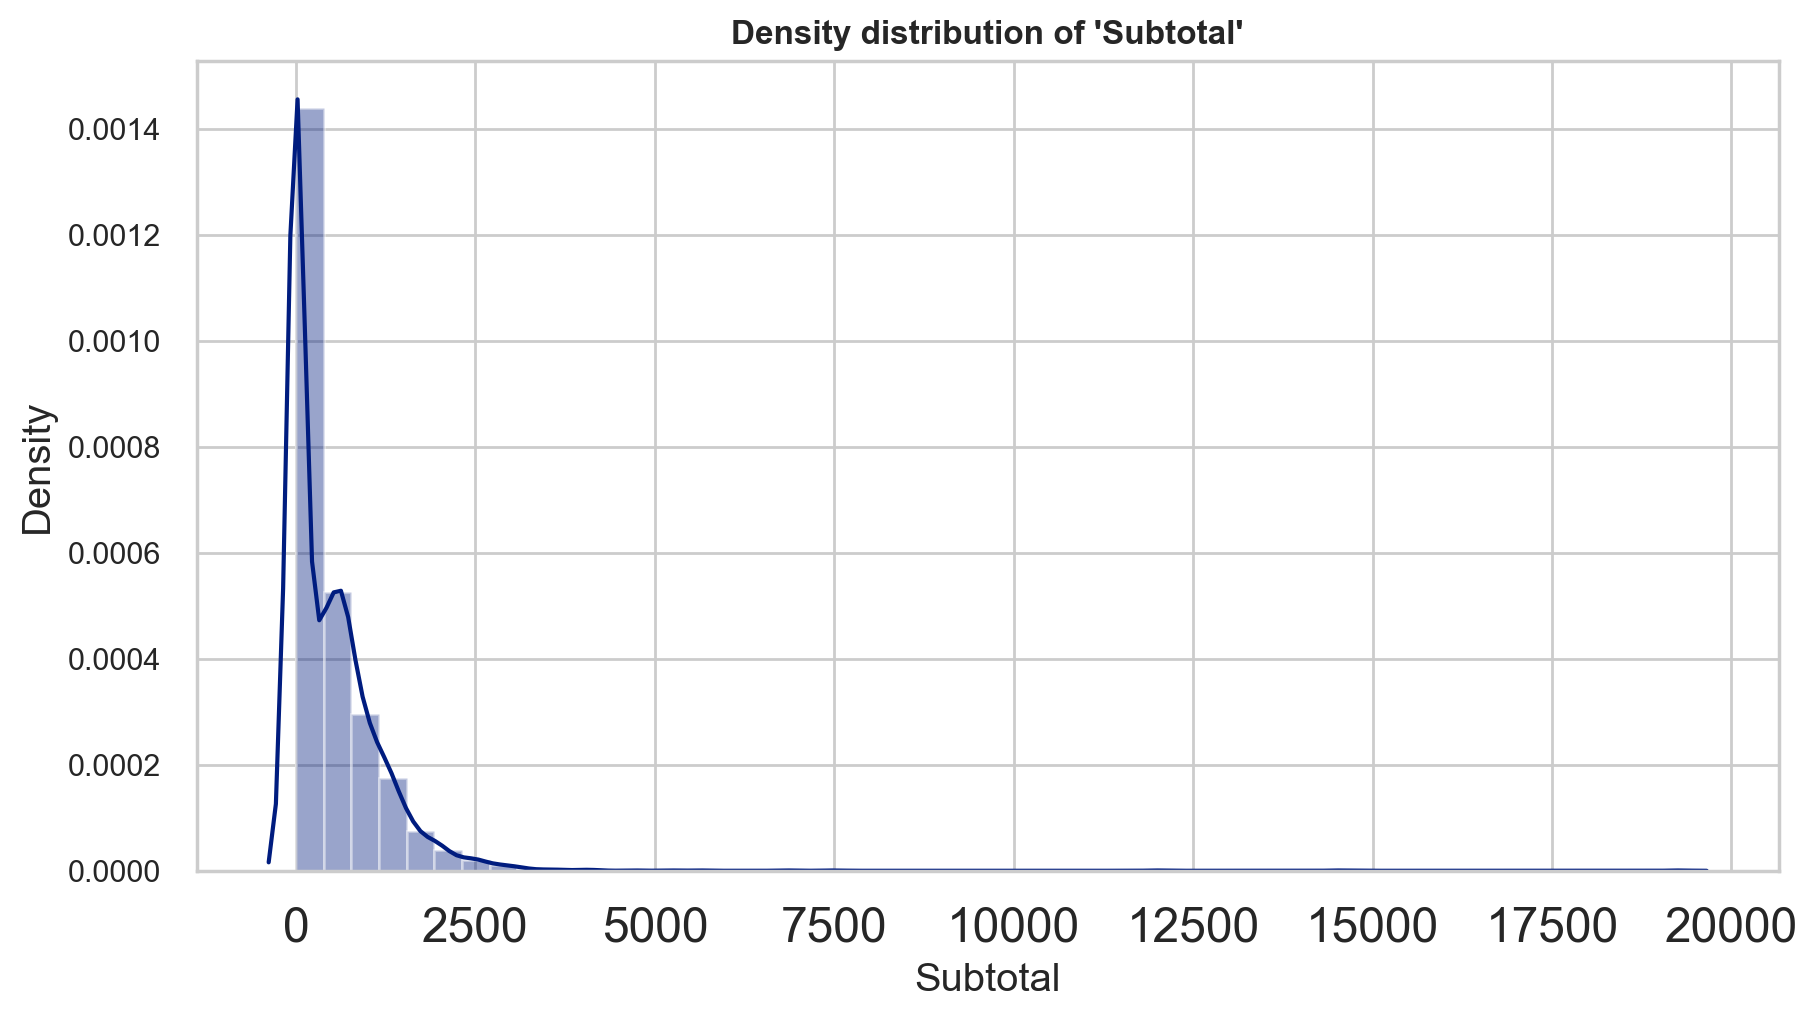

In [24]:
# Density plot
plt.subplot(1,2,1)
sns.distplot(order['Subtotal'], kde=True)
plt.title("Density distribution of 'Subtotal'",fontweight='bold')
plt.show()

In [25]:
order['Subtotal'].describe()

count     5654.000000
mean       485.319261
std        711.799107
min          0.000000
25%          0.000000
50%        299.000000
75%        750.000000
max      19275.000000
Name: Subtotal, dtype: float64

In [26]:
order['Subtotal'].skew()

6.740258282034019

The data is highly skewed means it is unsymmetrically distributed

The skewness is positive the distribution has longer tail towards right which means there are more values greater than the mean than smaller

In [27]:
order['Subtotal'].kurtosis()

128.91902168466746

High Kurtosis of the distribution denotes that there are heavy outlier in the data

In [28]:
order.groupby('Accepts_Marketing')['Accepts_Marketing'].count()

Accepts_Marketing
no      507
yes    5147
Name: Accepts_Marketing, dtype: int64

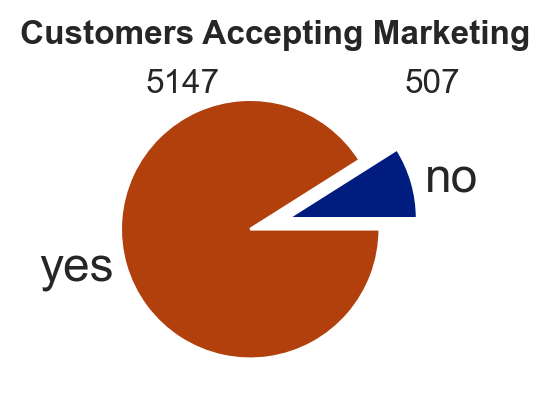

In [29]:
order.groupby('Accepts_Marketing')['Accepts_Marketing'].count().plot(kind='pie',figsize=(10,2),explode=(.1,.2),ylabel='')
plt.title('Customers Accepting Marketing',fontweight='bold')
plt.text(-1,1,5147)
plt.text(1,1,507)
plt.show()


In [30]:
sku_sold=order.groupby('Lineitem_name')['Lineitem_quantity'].sum().reset_index().sort_values(by='Lineitem_quantity',ascending=False)
sku_sold

Lineitem_name  Lineitem_quantity
266              Sardine (Chaalai) - 500 gms / Cleaned                333
3                Anchovy | Nethili - 500 gms / Cleaned                311
200  Medium Sized Prawn - 500 gms / Deshelled Devei...                273
309              Seer Fish Slices | Vanjaram - 500 gms                236
347  Small Sized Prawns - 500 gms / Deshelled Devei...                190
..                                                 ...                ...
318  Silver Pomfret (Big Size) | Vaval - 1 kg / Unc...                  1
186  Medium Size Emperor Fish - 1 kg / Cleaned and ...                  1
187  Medium Size Emperor Fish - 500 gms / Cleaned a...                  1
188  Medium Size Seer Fish (Vanjaram) - 500 gms / U...                  1
196  Medium Sized Prawn - 1 kg / Deshelled and Deve...                  1

[393 rows x 2 columns]

This shows the total quantities of each SKU sold overall

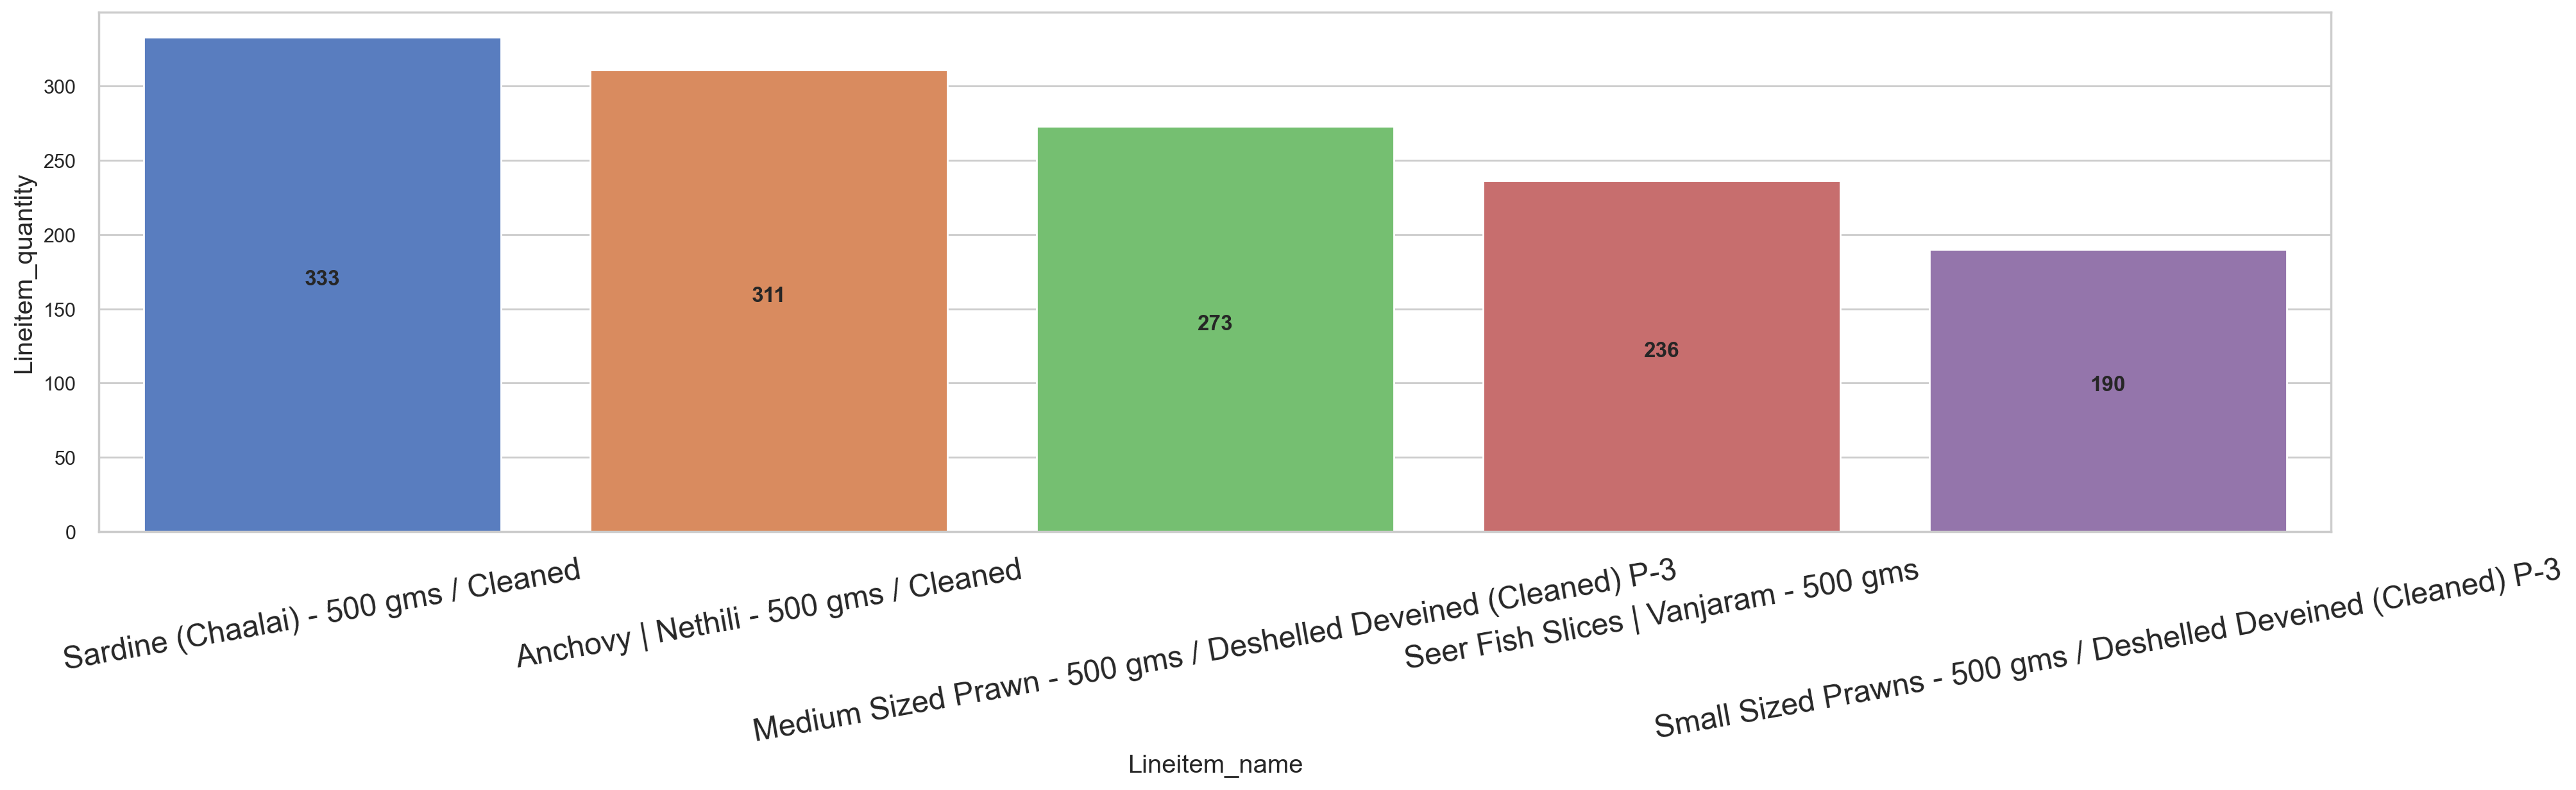

In [31]:
indexes=list(sku_sold.head().Lineitem_name)
values=list(sku_sold.head().Lineitem_quantity)
sns.barplot(x='Lineitem_name',y='Lineitem_quantity', data=sku_sold.head(),palette='muted')
plt.xticks(rotation=10)
for i in range(len(indexes)):
    plt.text(i,values[i]//2,values[i],ha='center',fontweight='bold')
plt.show()

In [32]:
province_item=order.groupby(['Shipping_Province_Name','Lineitem_name'])['Lineitem_quantity'].sum().reset_index()
province_item.sort_values(by='Lineitem_quantity',ascending=False)

Shipping_Province_Name                                      Lineitem_name  \
549             Tamil Nadu              Sardine (Chaalai) - 500 gms / Cleaned   
485             Tamil Nadu  Medium Sized Prawn - 500 gms / Deshelled Devei...   
302             Tamil Nadu              Anchovy | Nethili - 500 gms / Cleaned   
590             Tamil Nadu              Seer Fish Slices | Vanjaram - 500 gms   
623             Tamil Nadu  Small Sized Prawns - 500 gms / Deshelled Devei...   
..                     ...                                                ...   
294             Puducherry         Silver Biddy | Oodagam - 500 gms / Cleaned   
88               Karnataka  Flathead Grey mullet | Madavai - 500 gms / Cle...   
293             Puducherry     Silver Belly Fish | Kaaral - 500 gms / Cleaned   
327             Tamil Nadu  Black Mullet | Karu Nagarai - 500 gms / Cleane...   
200              Karnataka  Seer Fish (Small Size ) | Vanjaram - 500 gms /...   

     Lineitem_quantity  
549                225  
485                209  
302                206  
590                201  
623                162  
..                 ...  
294                  1  
88                   1  
293                  1  
327                  1  
200                  1  

[666 rows x 3 columns]

This shows the amount of each SKU's sold in each of the province

In [33]:
city_item=order.groupby(['Shipping_City','Lineitem_name'])['Lineitem_quantity'].sum().reset_index()
city_item

Shipping_City                                      Lineitem_name  \
0            Anaimalai   Banded Barracuda | Karai Ooli - 1 kg / Cleaned...   
1            Anaimalai                  Sardine (Chaalai) - 1 kg / Cleaned   
2            Anaimalai   Small Sized Prawns - 1 kg / Deshelled Deveined...   
3            Anuppanadi              Anchovy | Nethili - 500 gms / Cleaned   
4            Anuppanadi  Black Pomfret (Big Size) | Vaval - 1 kg / Clea...   
...                 ...                                                ...   
2020       Virudhunagar  Trevally (Big Size) | Paarai - 1 kg / Cleaned ...   
2021       Virudhunagar                           Tuna Meat | Surai - 1 kg   
2022  Yercaud main road  Butter fish | ponnaram - 1 kg / Cleaned and Cu...   
2023  Yercaud main road  Lady Finger | Kilangan - 500 gms / Cleaned and...   
2024      bodinayakanur  Lady Finger | Kilangan - 500 gms / Cleaned and...   

      Lineitem_quantity  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
...                 ...  
2020                  1  
2021                  1  
2022                  1  
2023                  1  
2024                  1  

[2025 rows x 3 columns]

This shows the number of each SKU's sold in each of the Cities

In [34]:
perday=order.groupby('Day_created')['Subtotal'].agg(np.sum).reset_index().sort_values(by='Subtotal',ascending=False)
indexes=list(perday.Day_created)
values=list(perday.Subtotal)
perday

Day_created  Subtotal
0      Friday  727931.6
2    Saturday  614208.2
4    Thursday  427810.0
5     Tuesday  382269.1
1      Monday  276836.5
6   Wednesday  217596.7
3      Sunday   97343.0

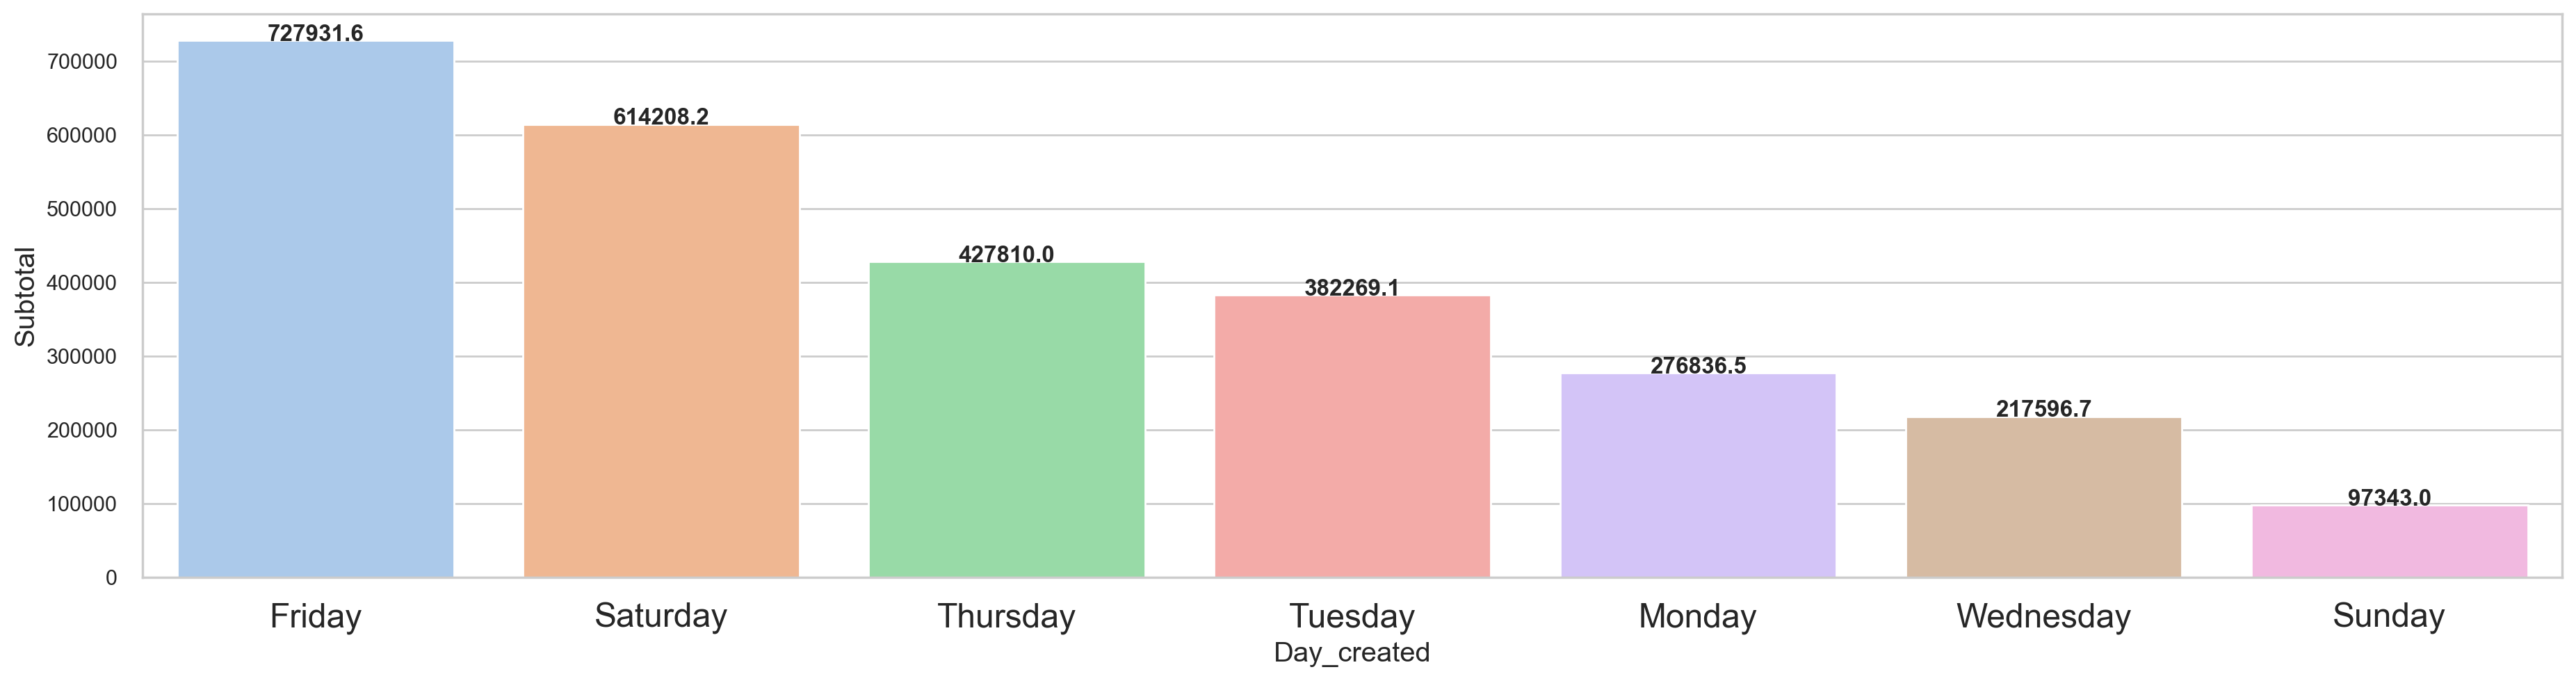

In [35]:
sns.barplot(data=perday,x='Day_created',y='Subtotal',palette='pastel')
for i in range(len(indexes)):
    plt.text(i,values[i],values[i],ha='center',fontweight='bold')
plt.show()


The boxplot shows the total sales per day. Friday and saturday has the highest total sales. The data shows people tend to buy more on friday and saturday hence the online ads should be targeted mainly on friday and saturday to boost more sales.

In [36]:
fishsold=order.groupby('Fish_name')['Lineitem_quantity'].sum().sort_values(ascending=False).reset_index(name='Count')
fishsold

Fish_name  Count
0                         Sardine (Chaalai)    499
1                        Medium Sized Prawn    486
2                         Anchovy | Nethili    409
3                        Small Sized Prawns    354
4               Seer Fish Slices | Vanjaram    296
..                                      ...    ...
93                          Seer Fish Slice      2
94                   Medium Pomfret (Black)      1
95         Medium Size Seer Fish (Vanjaram)      1
96                   Yellow Stripe Trevally      1
97  Red Mullet(Small Size) | Uruttu Nagarai      1

[98 rows x 2 columns]

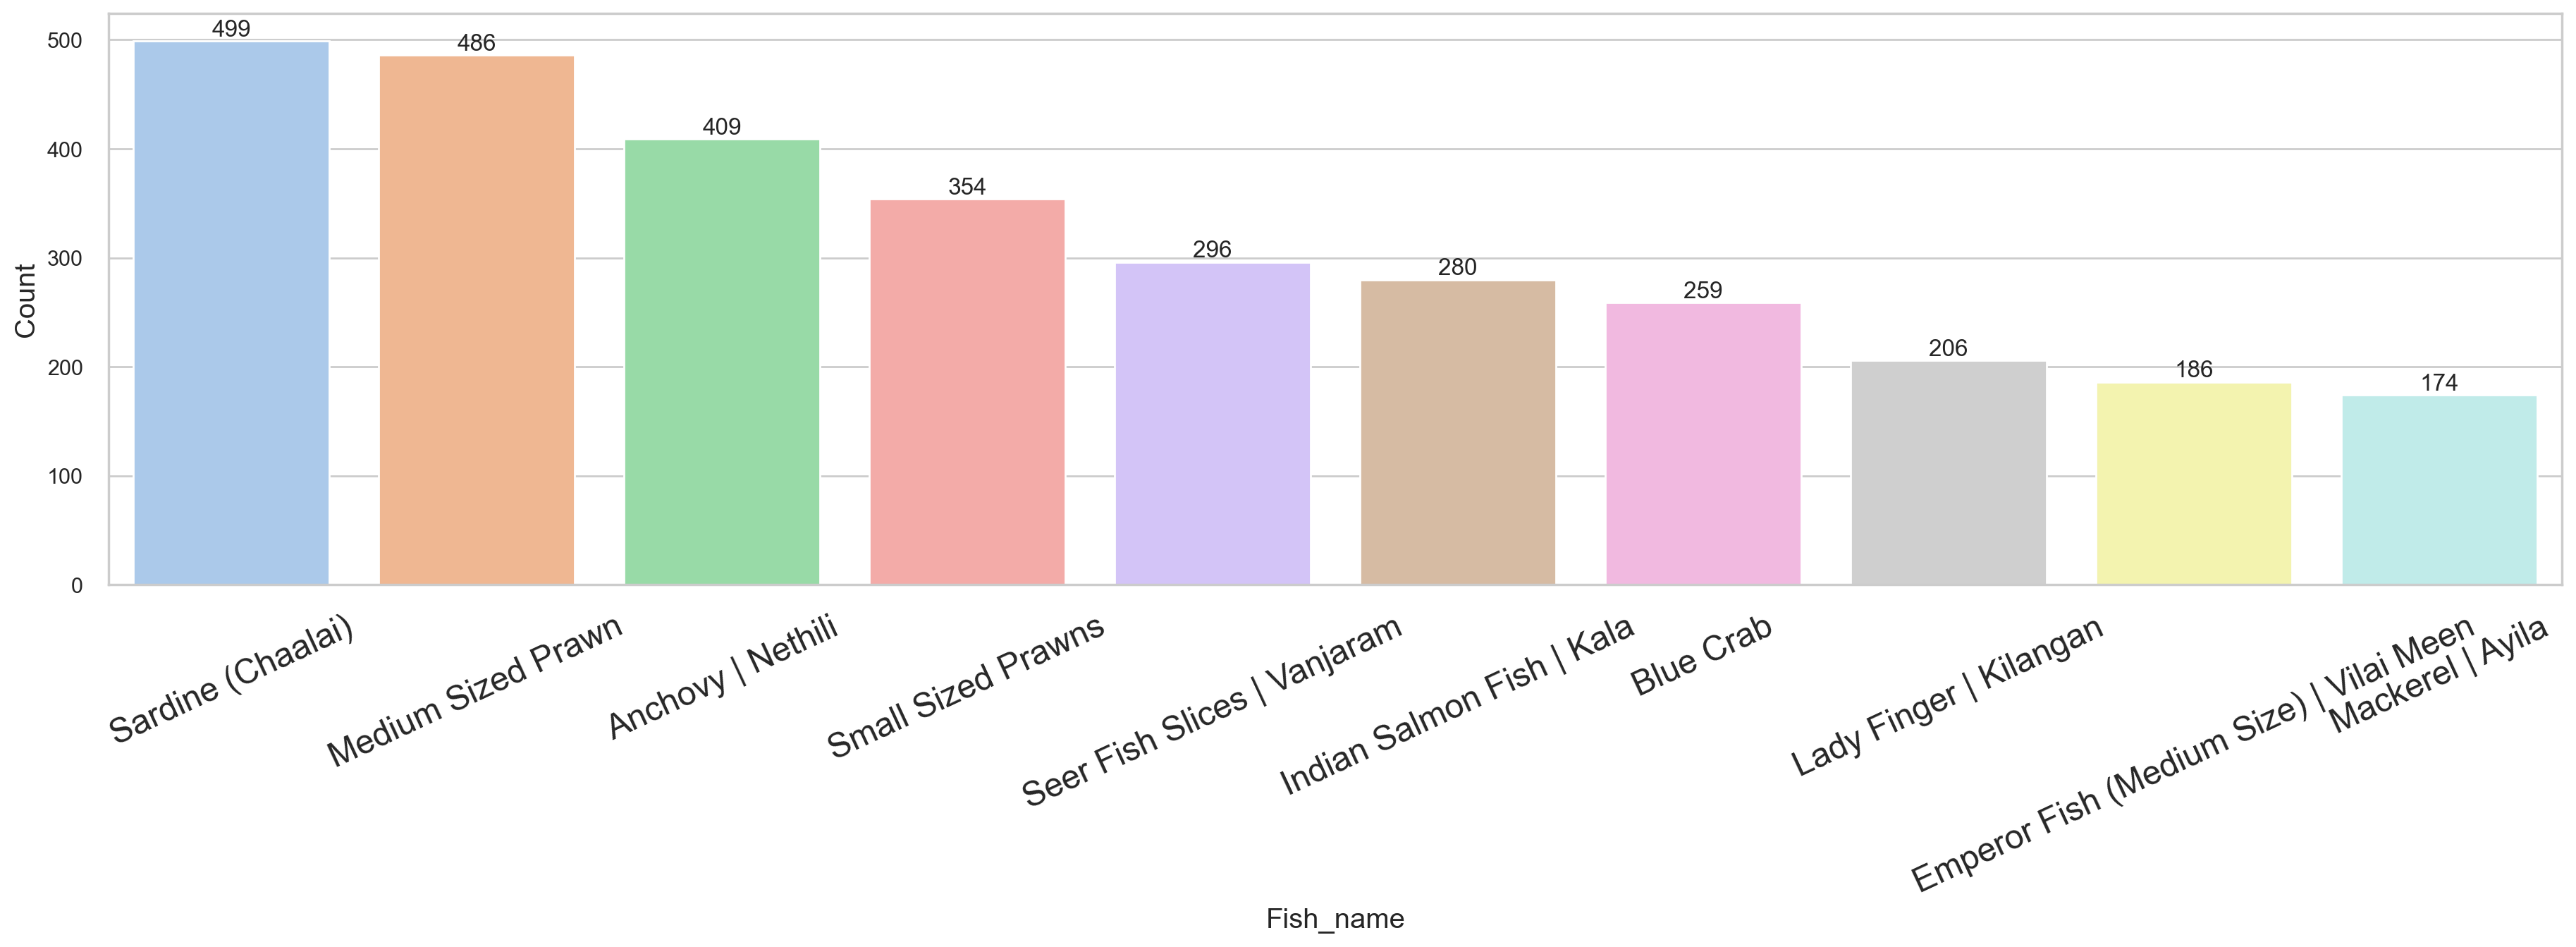

In [37]:
ax=sns.barplot(data=fishsold.head(10),x='Fish_name',y='Count',palette='pastel')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=25)
plt.show()

The barplot shows the top 10 best selling fish without considering the packing size of the fish.

In [38]:
cancelled_item=order.loc[(order.Cancelled_at!= 'na')|(order.Refunded_Amount >0)|(order.Outstanding_Balance >0)].apply(lambda x: x[['Lineitem_name','Lineitem_quantity']],axis=1)
cancelled_item=cancelled_item.groupby('Lineitem_name')['Lineitem_quantity'].sum().reset_index().sort_values(by='Lineitem_quantity',ascending=False)
cancelled_item

Lineitem_name  Lineitem_quantity
93                  Sardine (Chaalai) - 1 kg / Cleaned                 30
94               Sardine (Chaalai) - 500 gms / Cleaned                 25
38   Emperor Fish (Big Size) | Vilai Meen - 500 gms...                 14
26          Blue Crab - 500 gms / Cleaned and Cut -003                 12
126  Small Sized Prawns - 500 gms / Deshelled Devei...                 11
..                                                 ...                ...
62   Lobster - 1 kg / Deshelled Deveined (Cleaned) P-3                  1
61   Leather Jacket | Kilathi - 500 gms / Cleaned a...                  1
60   Leather Jacket | Kilathi - 1 kg / Cleaned and ...                  1
59   Lady Finger | Kilangan - 500 gms / Uncleaned a...                  1
80   Rainbow Runner fish | Poonguzhali - 500 gms / ...                  1

[142 rows x 2 columns]

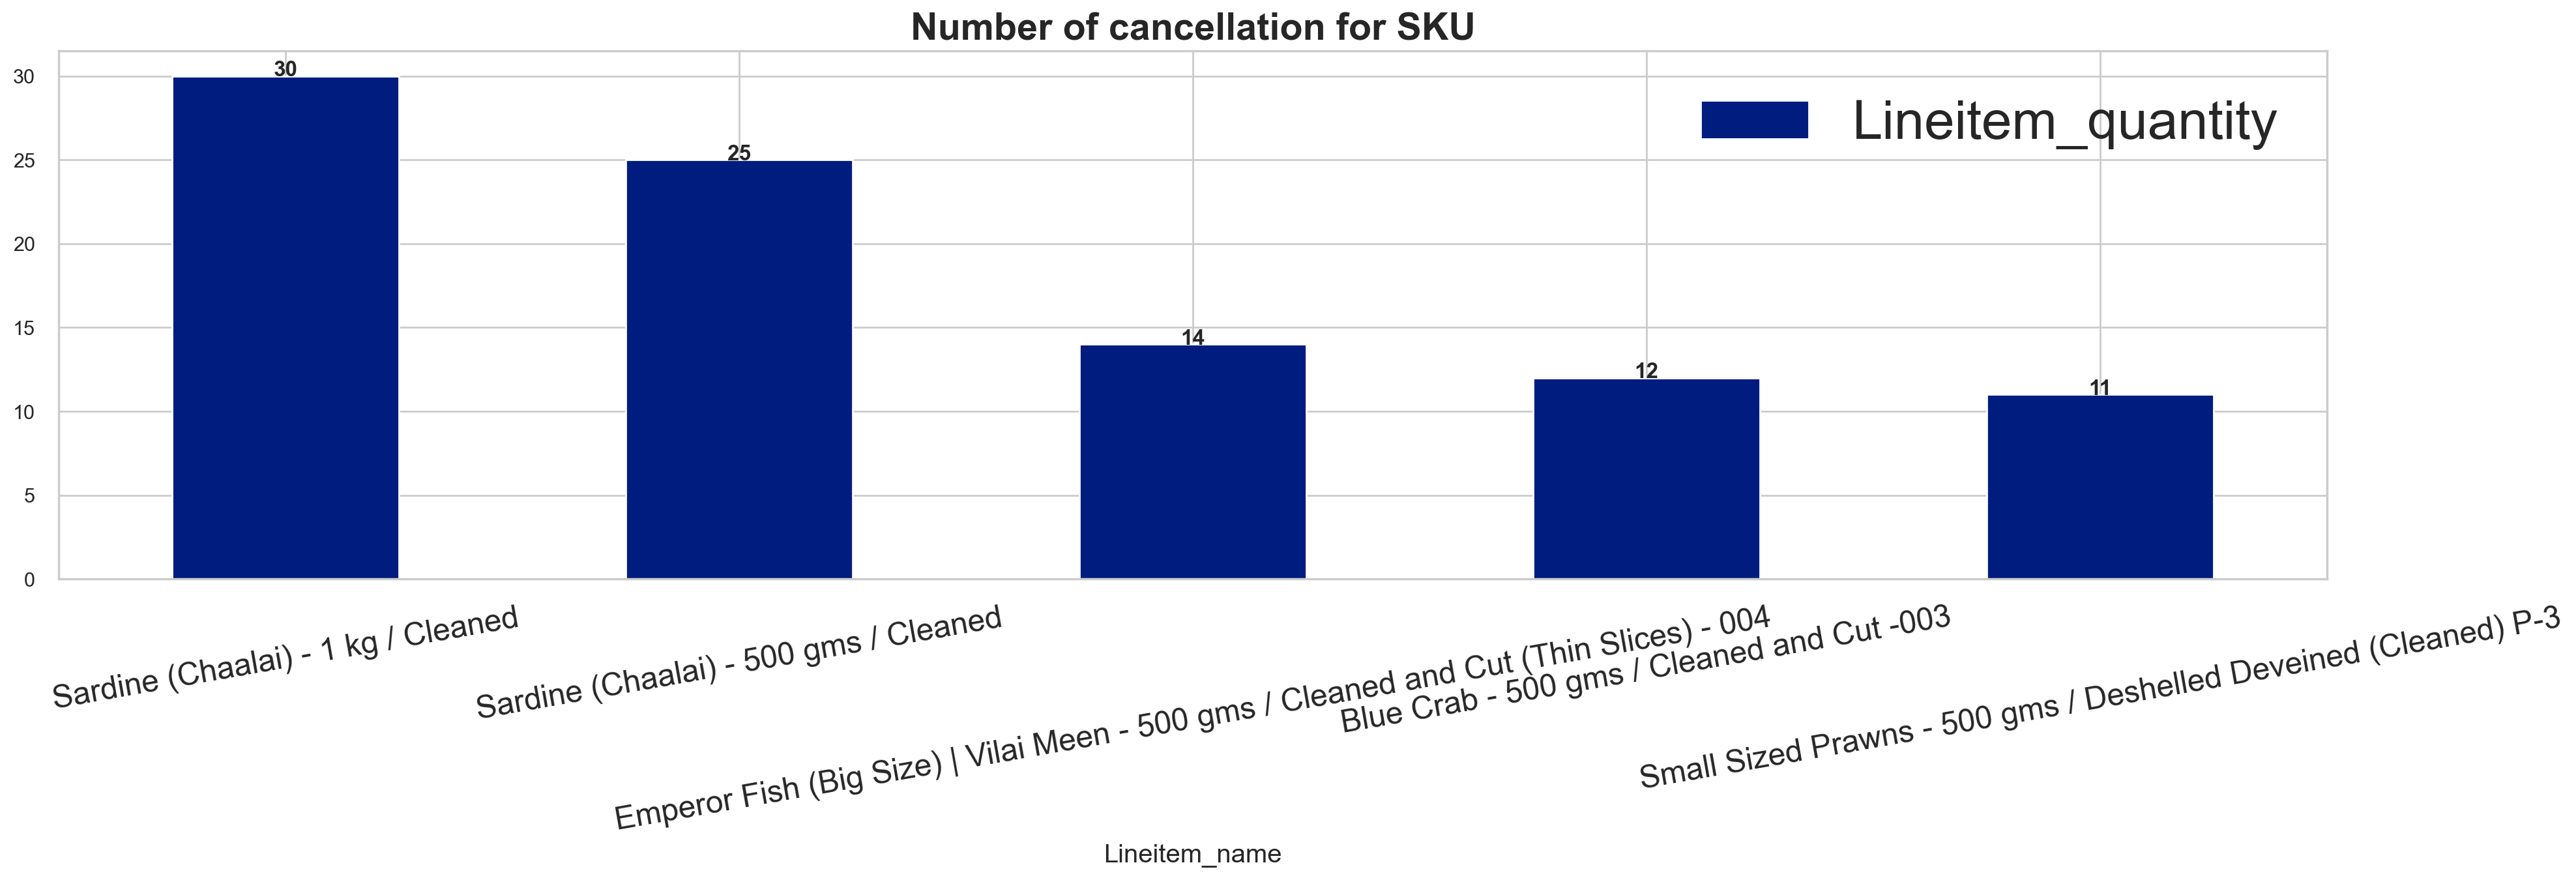

In [39]:
cancelled_item
indexes=list(cancelled_item.head(5).Lineitem_name)
values=list(cancelled_item.head(5).Lineitem_quantity)

cancelled_item.head(5).plot(x='Lineitem_name',y='Lineitem_quantity',kind='bar')
for i in range(len(indexes)):
    plt.text(i,values[i],values[i],ha='center',fontweight='bold')
plt.xticks(rotation=10)
plt.title('Number of cancellation for SKU',fontweight='bold',fontsize='xx-large')
plt.show()

This data shows the cancelled SKU's and the frequency of this item getting cancelled. The reason for cancellation may be poor quality or fish gone bad due to late shipment.

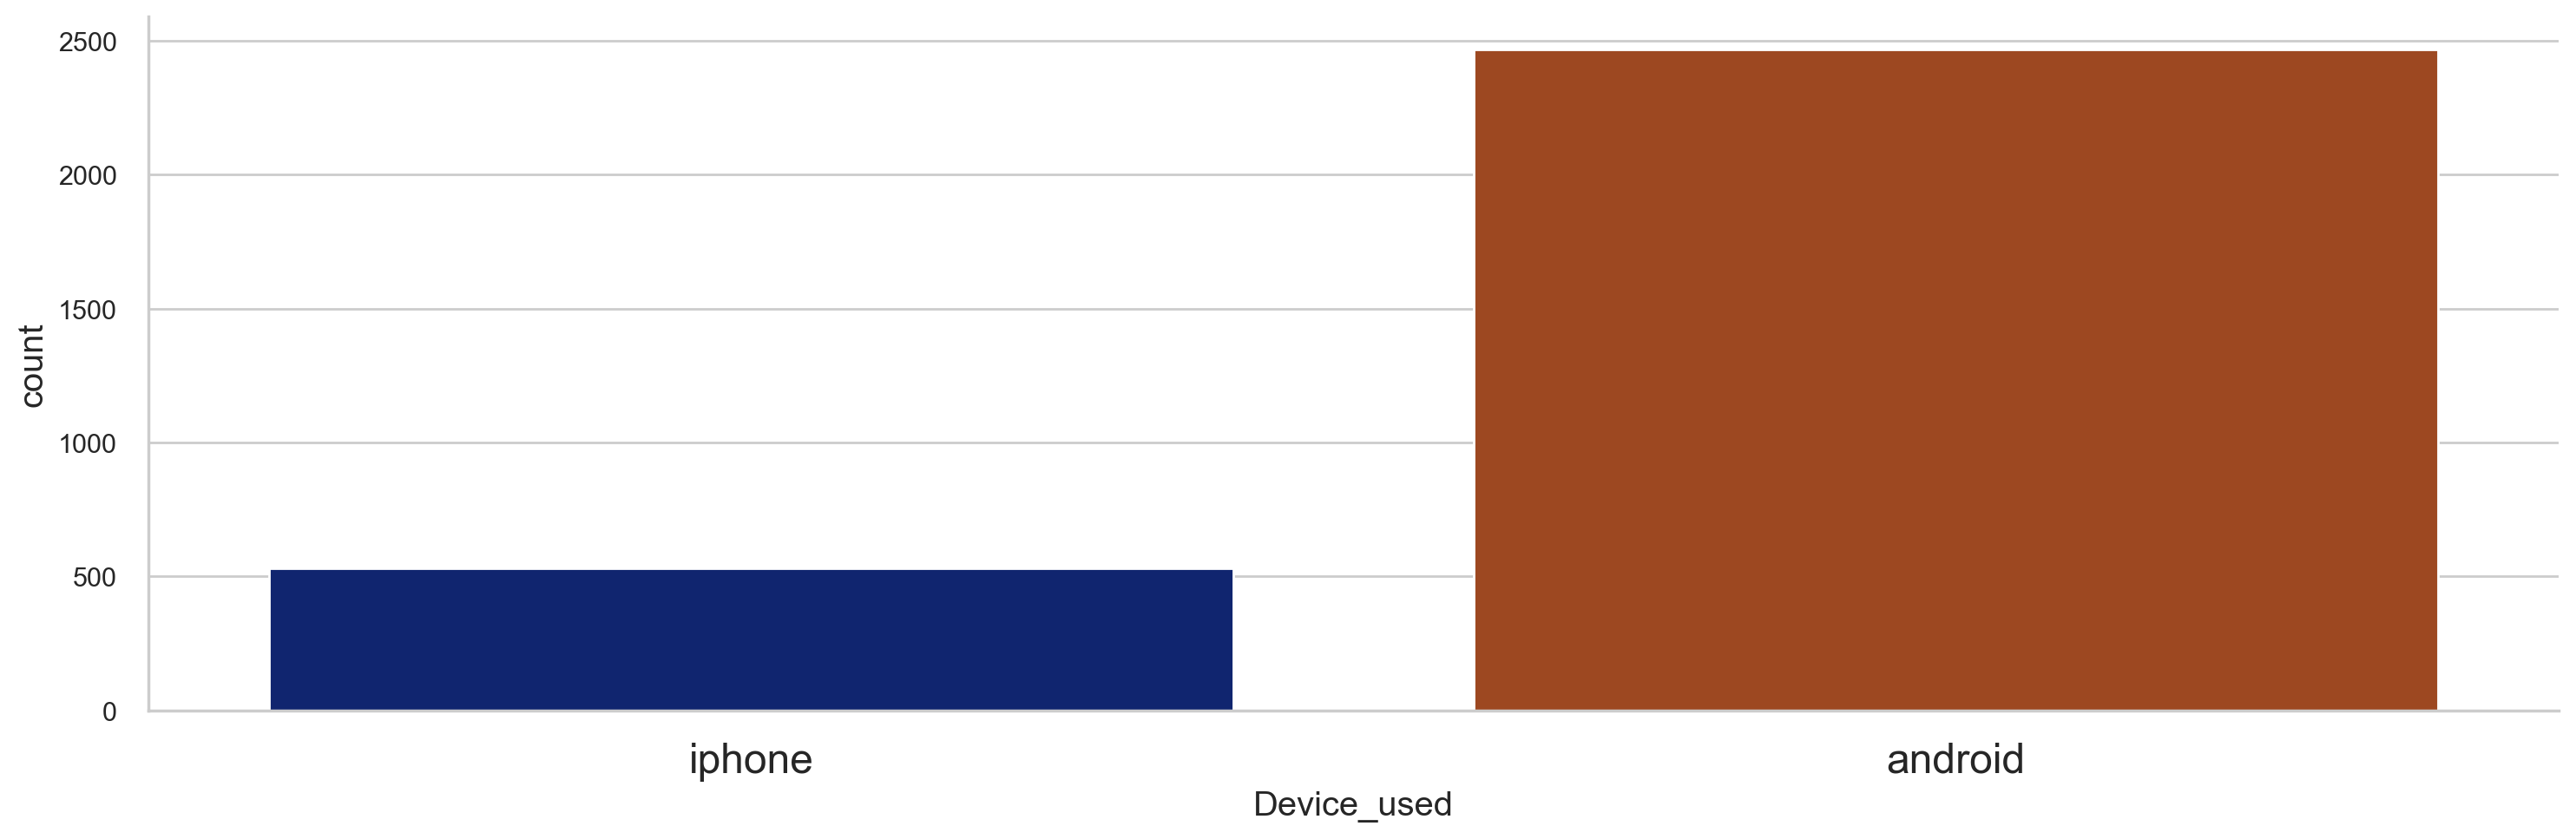

In [40]:
sns.factorplot(x='Device_used', data=order.loc[order['Device_used']!='na'] , kind='count' ,aspect=3)


The graph shows the number of android and iphone user who placed the order

In [371]:
order_per_user=order.groupby('Email').apply(lambda x: list(x.Lineitem_name)).reset_index()
#return all SKU ordered by a customer as a list
order_per_user.rename(columns={0:'Items_ordered'},inplace=True)
order_per_user

Email  \
0     '+919176655042@freshkatch.myshopify.com   
1     '+919442318200@freshkatch.myshopify.com   
2     '+919740403053@freshkatch.myshopify.com   
3     '+919840792580@freshkatch.myshopify.com   
4     '+919884400714@freshkatch.myshopify.com   
...                                       ...   
1320                 yogeshmsc.apps@gmail.com   
1321                       yohainfo@gmail.com   
1322                     yuvaarch97@gmail.com   
1323                      zaiddroid@gmail.com   
1324                        zoe8081@gmail.com   

                                          Items_ordered  
0     [Black Pomfret (Big Size) | Vaval - 500 gms / ...  
1     [Sardine (Chaalai) - 500 gms / Cleaned, Anchov...  
2     [Mackerel | Ayila - 1 kg / Cleaned and Uncut -...  
3     [Seer Fish Slices | Vanjaram - 500 gms, Jumbo ...  
4                  [Sardine (Chaalai) - 1 kg / Cleaned]  
...                                                 ...  
1320  [Medium Sized Prawn - 1 kg / Deshelled Deveine...  
1321  [Silver Pomfret (Small Size) | Vaval - 500 gms...  
1322  [Anchovy | Nethili - 500 gms / Cleaned, Leathe...  
1323          [Lady Finger | Kilangan - 1 kg / Cleaned]  
1324  [Seer Fish (Small Size ) | Vanjaram - 1 Kg / C...  

[1325 rows x 2 columns]

This is the list of all the SKUs ordered by a user

In [372]:
# all customer for each SKU
products = order[['Lineitem_name', 'Email', 'Lineitem_quantity']].groupby(['Lineitem_name', 'Email']).count().reset_index()
# filter only top ten customer for each SKU
products_topten = pd.DataFrame()
for p in products['Lineitem_name'].unique():
    p_df = products[products['Lineitem_name']==p].sort_values('Lineitem_quantity', ascending=False).reset_index()
    p_df = p_df[0:10]
    products_topten = products_topten.append(p_df)
products_topten.drop(['index'],axis=1)


Lineitem_name  \
0                            Anchovy - 1 kg / Cleaned   
1                            Anchovy - 1 kg / Cleaned   
0                         Anchovy - 500 gms / Cleaned   
1                         Anchovy - 500 gms / Cleaned   
2                         Anchovy - 500 gms / Cleaned   
..                                                ...   
1   Yellow Tailed Barracuda | Thadiyan - 500 gms /...   
2   Yellow Tailed Barracuda | Thadiyan - 500 gms /...   
3   Yellow Tailed Barracuda | Thadiyan - 500 gms /...   
4   Yellow Tailed Barracuda | Thadiyan - 500 gms /...   
5   Yellow Tailed Barracuda | Thadiyan - 500 gms /...   

                          Email  Lineitem_quantity  
0        hh9600838340@gmail.com                  1  
1   sathishkumarbuvan@gmail.com                  1  
0          drvsarathy@gmail.com                  1  
1       malarvizhi.ms@gmail.com                  1  
2       sarthakmandal@gmail.com                  1  
..                          ...                ...  
1       chellakumar.m@gmail.com                  1  
2    j.shanmugaprabhu@gmail.com                  1  
3         radharajan04@yahoo.in                  1  
4        senthil.kogs@gmail.com                  1  
5          ssharath74@gmail.com                  1  

[1998 rows x 3 columns]

This is the list of SKUs and the top ten customers who ordered the product.

# Making Product Combos for SKU's who are most frequently bought together

In [93]:
#frequent_itemsets = apriori(datafinal, min_support=0.007, use_colnames=True)
#rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
#rules.head()

In [114]:
data=pd.read_csv('order_export.csv')
datadup=data=pd.read_csv('order_export.csv')

In [115]:
x=data.merge(datadup,left_on='Name',right_on='Name')
xnew=x[x['Lineitem_name_x']!=x['Lineitem_name_y']]


In [116]:
xnew['sorted'] = xnew.apply(lambda x: ' and '.join(sorted([x['Lineitem_name_x'],x['Lineitem_name_y']])),axis=1)

In [117]:
xnew.drop_duplicates(subset='sorted')

Name                      Email_x Accepts_Marketing_x  \
5      #FSK4096         ndsemily66@gmail.com                 yes   
6      #FSK4096         ndsemily66@gmail.com                 yes   
9      #FSK4096         ndsemily66@gmail.com                 yes   
18     #FSK4091          chimsubbu@gmail.com                 yes   
19     #FSK4091          chimsubbu@gmail.com                 yes   
...         ...                          ...                 ...   
13257  #FSK1006     amrbatteryshop@gmail.com                 yes   
13261  #FSK1005             pavals@gmail.com                 yes   
13262  #FSK1005             pavals@gmail.com                 yes   
13265  #FSK1005             pavals@gmail.com                 yes   
13270  #FSK1004  ravichandranp2818@gmail.com                 yes   

      Financial_Status_x Fulfillment_Status_x Fulfilled_at_x  Subtotal_x  \
5                   paid          unfulfilled            NaN      1275.0   
6                   paid          unfulfilled            NaN      1275.0   
9                   paid          unfulfilled            NaN         NaN   
18                  paid          unfulfilled            NaN      1237.5   
19                  paid          unfulfilled            NaN      1237.5   
...                  ...                  ...            ...         ...   
13257               paid            fulfilled       26/03/22       730.0   
13261               paid            fulfilled       26/03/22       890.0   
13262               paid            fulfilled       26/03/22       890.0   
13265               paid            fulfilled       26/03/22         NaN   
13270               paid            fulfilled       26/03/22       290.0   

       Shipping_x  Total_x Discount_Code_x  Discount_Amount_x  \
5             0.0   1275.0             NaN                0.0   
6             0.0   1275.0             NaN                0.0   
9             NaN      NaN             NaN                NaN   
18            0.0   1237.5          FOFI10              137.5   
19            0.0   1237.5          FOFI10              137.5   
...           ...      ...             ...                ...   
13257         0.0    730.0             NaN                0.0   
13261         0.0    890.0             NaN                0.0   
13262         0.0    890.0             NaN                0.0   
13265         NaN      NaN             NaN                NaN   
13270         0.0    290.0             NaN                0.0   

      Shipping_Method_x Date_created_x Time_created_x Day_created_x  \
5         Free Shipping       04/09/22    11:39:32 AM        Sunday   
6         Free Shipping       04/09/22    11:39:32 AM        Sunday   
9         Free Shipping       04/09/22    11:39:32 AM        Sunday   
18        Free Shipping       03/09/22     8:28:58 PM      Saturday   
19        Free Shipping       03/09/22     8:28:58 PM      Saturday   
...                 ...            ...            ...           ...   
13257          Standard       20/01/22     7:14:34 PM      Thursday   
13261          Standard       20/01/22     4:24:37 PM      Thursday   
13262          Standard       20/01/22     4:24:37 PM      Thursday   
13265          Standard       20/01/22     4:24:37 PM      Thursday   
13270          Standard       20/01/22     3:09:47 PM      Thursday   

                                         Lineitem_name_x  Lineitem_quantity_x  \
5             Lady Finger | Kilangan - 500 gms / Cleaned                    1   
6             Lady Finger | Kilangan - 500 gms / Cleaned                    1   
9      Seer Fish (Medium Size) | Vanjaram - 500 gms /...                    1   
18     BARRACUDA | Maa Oola - 500 gms / Cleaned and C...                    1   
19     BARRACUDA | Maa Oola - 500 gms / Cleaned and C...                    1   
...                                                  ...                  ...   
13257  Medium Size Silver Pomfret - 500 gms / Cleaned...                    1   

In [118]:
x.to_csv('checknow.csv')

In [131]:
datanew=xnew.groupby(['sorted'])['Name'].count()
datanew.to_frame(name="count").sort_values(by=["count"],ascending=False).head(10)

count
sorted                                                   
Anchovy | Nethili - 500 gms / Cleaned and Sardi...     70
Anchovy | Nethili - 500 gms / Cleaned and Mediu...     48
Seer Fish Slices | Vanjaram - 500 gms and Small...     42
Anchovy | Nethili - 500 gms / Cleaned and Small...     40
Anchovy | Nethili - 500 gms / Cleaned and Seer ...     38
Sardine (Chaalai) - 500 gms / Cleaned and Small...     36
Sardine (Chaalai) - 500 gms / Cleaned and Silve...     36
Medium Sized Prawn - 500 gms / Deshelled Devein...     34
Blue Crab - 500 gms / Cleaned and Cut -003 and ...     32
Blue Crab - 500 gms / Cleaned and Cut -003 and ...     32

In [143]:
datanew_sorted=datanew.reset_index().rename(columns={'sorted':'Combo','Name':'Count'}).sort_values(by='Count',ascending=False)
datanew_sorted.head(10)

Combo  Count
169   Anchovy | Nethili - 500 gms / Cleaned and Sard...     70
142   Anchovy | Nethili - 500 gms / Cleaned and Medi...     48
2330  Seer Fish Slices | Vanjaram - 500 gms and Smal...     42
190   Anchovy | Nethili - 500 gms / Cleaned and Smal...     40
180   Anchovy | Nethili - 500 gms / Cleaned and Seer...     38
2219  Sardine (Chaalai) - 500 gms / Cleaned and Smal...     36
2212  Sardine (Chaalai) - 500 gms / Cleaned and Silv...     36
1871  Medium Sized Prawn - 500 gms / Deshelled Devei...     34
730   Blue Crab - 500 gms / Cleaned and Cut -003 and...     32
742   Blue Crab - 500 gms / Cleaned and Cut -003 and...     32

In [414]:
datanew_sorted.to_excel('Product_Combo.xlsx')

# RFM Analysis

We are going to analysis the Customers based on below 3 factors:

R (Recency): Number of days since last purchase

F (Frequency): Number of tracsactions

M (Monetary): Total amount of transactions (revenue contributed)

# Monetary

In [42]:
rfm_m = order.groupby('Email')['Lineitem_total'].sum().reset_index()
rfm_m.head()

Email  Lineitem_total
0  '+919176655042@freshkatch.myshopify.com             825
1  '+919442318200@freshkatch.myshopify.com             620
2  '+919740403053@freshkatch.myshopify.com             815
3  '+919840792580@freshkatch.myshopify.com            1325
4  '+919884400714@freshkatch.myshopify.com             330

# Frequency

In [43]:
rfm_f = order.groupby('Email')['Name'].count().reset_index()
rfm_f.columns = ['Email', 'Frequency']
rfm_f.head()

Email  Frequency
0  '+919176655042@freshkatch.myshopify.com          2
1  '+919442318200@freshkatch.myshopify.com          2
2  '+919740403053@freshkatch.myshopify.com          2
3  '+919840792580@freshkatch.myshopify.com          2
4  '+919884400714@freshkatch.myshopify.com          1

In [44]:
rfm = pd.merge(rfm_m, rfm_f, on='Email', how='inner')
rfm.head()

Email  Lineitem_total  Frequency
0  '+919176655042@freshkatch.myshopify.com             825          2
1  '+919442318200@freshkatch.myshopify.com             620          2
2  '+919740403053@freshkatch.myshopify.com             815          2
3  '+919840792580@freshkatch.myshopify.com            1325          2
4  '+919884400714@freshkatch.myshopify.com             330          1

# Recency

In [45]:
order['Date_created'] = pd.to_datetime(order['Date_created'])

In [46]:
max_date = max(order['Date_created'])
max_date

Timestamp('2022-12-08 00:00:00')

In [47]:
# Compute the difference between max date and transaction date

order['Diff'] = max_date - order['Date_created']
order.head()

Name                       Email Accepts_Marketing Financial_Status  \
0  #FSK4100       tamilanazad@gmail.com               yes             paid   
1  #FSK4099  rijeshmdevadasan@gmail.com               yes             paid   
2  #FSK4098  rijeshmdevadasan@gmail.com               yes             paid   
3  #FSK4097      s.krishnanlp@gmail.com               yes             paid   
4  #FSK4096        ndsemily66@gmail.com               yes             paid   

  Fulfillment_Status Fulfilled_at  Subtotal  Shipping   Total Discount_Code  \
0        unfulfilled           na     300.0       0.0   300.0            na   
1        unfulfilled           na     165.0      49.0   214.0            na   
2        unfulfilled           na     550.0       0.0   550.0            na   
3        unfulfilled           na     165.0      49.0   214.0            na   
4        unfulfilled           na    1275.0       0.0  1275.0            na   

   Discount_Amount    Shipping_Method Date_created Time_created Day_created  \
0              0.0      Free Shipping   2022-04-09   7:31:19 PM      Sunday   
1              0.0  Standard Shipping   2022-04-09   4:37:56 PM      Sunday   
2              0.0      Free Shipping   2022-04-09   3:29:29 PM      Sunday   
3              0.0  Standard Shipping   2022-04-09   3:01:16 PM      Sunday   
4              0.0      Free Shipping   2022-04-09  11:39:32 AM      Sunday   

                                       Lineitem_name  \
0  Emperor Fish (Medium Size) | Vilai Meen - 500 ...   
1                Sardine (Keeri) - 500 gms / Cleaned   
2                             Blue crab meat - 500 g   
3              Sardine (Chaalai) - 500 gms / Cleaned   
4         Lady Finger | Kilangan - 500 gms / Cleaned   

                                 Fish_name Fish_packsize  \
0  Emperor Fish (Medium Size) | Vilai Meen       500 gms   
1                          Sardine (Keeri)       500 gms   
2                           Blue crab meat       500 gms   
3                        Sardine (Chaalai)       500 gms   
4                   Lady Finger | Kilangan       500 gms   

                        Fish_cut  Lineitem_quantity  Lineitem_price  \
0  Cleaned and Cut (Thin Slices)                  1             300   
1                        Cleaned                  1             165   
2                             na                  1             550   
3                        Cleaned                  1             165   
4                        Cleaned                  1             350   

  Lineitem_compare_at_price  Lineitem_total Lineitem_fulfillment_status  \
0                        na             300                     pending   
1                        na             165                     pending   
2                        na             550                     pending   
3                        na             165                     pending   
4                        na             350                     pending   

  Shipping_City Shipping_Province_Name Cancelled_at   Payment_Method  \
0       Madurai             Tamil Nadu           na  Razorpay Secure   
1   Tirunelveli             Tamil Nadu           na  Razorpay Secure   
2   Tirunelveli             Tamil Nadu           na  Razorpay Secure   
3     Bengaluru              Karnataka           na  Razorpay Secure   
4     Bengaluru              Karnataka           na  Razorpay Secure   

  Giftcard_used  Refunded_Amount  Outstanding_Balance Source Device_used  \
0            No              0.0                  0.0    web      iphone   
1            No              0.0                  0.0    web      iphone   
2            No              0.0                  0.0    web          na   
3            No              0.0                  0.0    web      iphone   
4            No              0.0                  0.0    web          na   

  vajro_mobile_app_used     Diff  
0                   yes 243 days  
1                   yes 243 days  
2                

In [48]:
# Compute last transaction date to get the recency of customers

rfm_p = order.groupby('Email')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

Email     Diff
0  '+919176655042@freshkatch.myshopify.com 107 days
1  '+919442318200@freshkatch.myshopify.com 238 days
2  '+919740403053@freshkatch.myshopify.com 230 days
3  '+919840792580@freshkatch.myshopify.com 214 days
4  '+919884400714@freshkatch.myshopify.com 111 days

In [49]:
rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

Email  Diff
0  '+919176655042@freshkatch.myshopify.com   107
1  '+919442318200@freshkatch.myshopify.com   238
2  '+919740403053@freshkatch.myshopify.com   230
3  '+919840792580@freshkatch.myshopify.com   214
4  '+919884400714@freshkatch.myshopify.com   111

In [50]:
rfm = pd.merge(rfm, rfm_p, on='Email', how='inner')
rfm.columns = ['Email', 'Amount', 'Frequency', 'Recency']
rfm.head()

Email  Amount  Frequency  Recency
0  '+919176655042@freshkatch.myshopify.com     825          2      107
1  '+919442318200@freshkatch.myshopify.com     620          2      238
2  '+919740403053@freshkatch.myshopify.com     815          2      230
3  '+919840792580@freshkatch.myshopify.com    1325          2      214
4  '+919884400714@freshkatch.myshopify.com     330          1      111

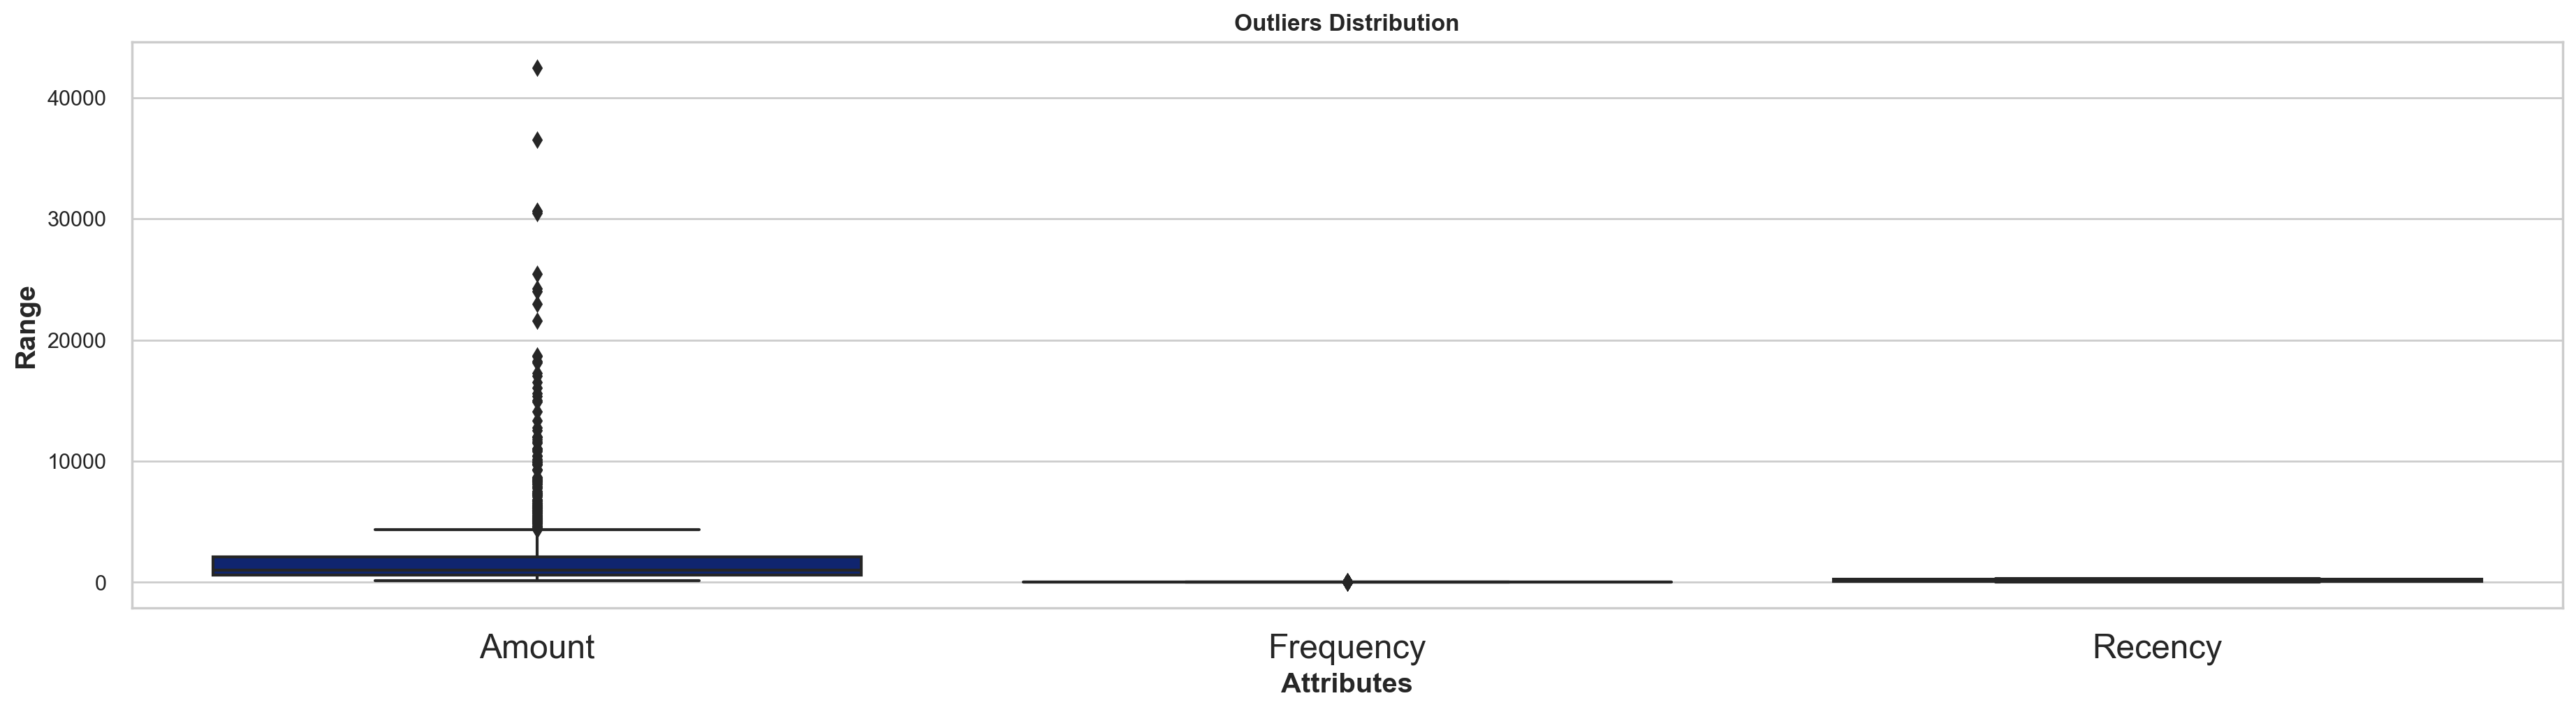

In [51]:
sns.boxplot(data = rfm)
plt.title("Outliers Distribution",fontweight='bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.show()

In [52]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

# Rescaling the Attributes

In [53]:
# rfm_df = rfm[['Amount', 'Frequency', 'Recency']]
# rfm_df.head()

In [54]:
# from mlxtend.preprocessing import minmax_scaling

# rfm_df_scaled=minmax_scaling(rfm_df, columns=['Amount', 'Frequency', 'Recency'])
# rfm_df_scaled.head()

# Clustering of the Clients based on the RFM Analysis of the data

### Number of Clusters

#### Elbow Curve to find right number of Clusters


A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

In [55]:
# # Elbow-curve/SSD

# ssd = []
# range_n_clusters = range(2,10)
# for num_clusters in range_n_clusters:
#     kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
#     kmeans.fit(rfm_df_scaled)
    
#     ssd.append(kmeans.inertia_)
# # plot the SSDs for each n_clusters
# plt.plot(ssd)

In [56]:
# # Silhouette analysis
# range_n_clusters = range(2,10)

# for num_clusters in range_n_clusters:
    
#     # intialise kmeans
#     kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
#     kmeans.fit(rfm_df_scaled)
    
#     cluster_labels = kmeans.labels_
    
#     # silhouette score
#     silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
#     print("For {0} number of clusters, the silhouette score is {1}".format(num_clusters, silhouette_avg))

Since the silhouette score keeps dropping after 3 number of cluster 3 should be selected for k value.
#### Hence after the analysis the right number of cluster is 3

In [57]:
# # Final model with k=3
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(rfm_df_scaled)

In [58]:
#  kmeans.labels_

In [59]:
# # assign the label
# rfm['Cluster_Id'] = kmeans.labels_
# rfm.head()

In [60]:
# sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

In [61]:
# sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

In [62]:
# sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

Analysing the graph for all the 3 clusters different strategies should be implemented to target these 3 different categories of customer based on there buying habit

In [63]:
# cluster_detail=rfm.groupby('Cluster_Id').mean().reset_index()
# cluster_detail['Number_of_User']=rfm.groupby('Cluster_Id')['Email'].count()
# cluster_detail.rename(columns = {'Amount':'Mean_Amount','Frequency':'Mean_Frequency','Recency':'Mean_Recency'},inplace=True)
# cluster_detail

In [64]:
# ax=sns.barplot(x='Cluster_Id',y='Mean_Amount',data=cluster_detail,hue='Number_of_User')
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
# ax.bar_label(ax.containers[2])
# plt.show()

In [65]:
# ax=sns.barplot(x='Cluster_Id',y='Mean_Frequency',data=cluster_detail,hue='Number_of_User')
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
# ax.bar_label(ax.containers[2])
# plt.show()

In [66]:
# ax=sns.barplot(x='Cluster_Id',y='Mean_Recency',data=cluster_detail,hue='Number_of_User')
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
# ax.bar_label(ax.containers[2])
# plt.show()

In [67]:
# customer_details=rfm.copy().drop('Cluster_Id',axis=1)

In [68]:
# customer_details.head()

In [69]:
# customer_details['Amount_cluster'] = pd.qcut(customer_details['Amount'], 5, labels=False)
# customer_details['Frequency_cluster'] = pd.qcut(customer_details['Frequency'], 5, labels=False,duplicates='drop')
# customer_details['Recency_cluster'] = pd.qcut(customer_details['Recency'], 5, labels=False)

In [70]:
# customer_details.groupby('Amount_cluster')['Email'].count()

In [71]:
# customer_details.groupby('Frequency_cluster')['Email'].count()

In [72]:
# customer_details.groupby('Recency_cluster')['Email'].count()

In [73]:
# customer_details.loc[(customer_details.Amount_cluster==4) & (customer_details.Frequency_cluster==3)& (customer_details.Recency_cluster==0)]



In [74]:
# customer_details.loc[(customer_details.Amount_cluster==3) & (customer_details.Frequency_cluster==2)& (customer_details.Recency_cluster==1)]


In [75]:
# customer_details.loc[(customer_details.Amount_cluster==2) & (customer_details.Frequency_cluster==1)& (customer_details.Recency_cluster==2)]


In [76]:
# customer_details.loc[(customer_details.Amount_cluster==1) & (customer_details.Frequency_cluster==1)& (customer_details.Recency_cluster==3)]


In [77]:
# customer_details.loc[(customer_details.Amount_cluster==0) & (customer_details.Frequency_cluster==0)& (customer_details.Recency_cluster==4)]


# Customer categories according to RFM analysis using Kmeans clustering

In [330]:
# inactive_c=rfm_clustered.loc[(rfm_clustered.Amount_Cluster==0) & (rfm_clustered.Frequency_Cluster==0)& (rfm_clustered.Recency_Cluster==2)]
# inactive_c


In [331]:
# medium_c=rfm_clustered.loc[(rfm_clustered.Amount_Cluster==1) & (rfm_clustered.Frequency_Cluster==1)& (rfm_clustered.Recency_Cluster==1)]
# medium_c

In [332]:
# very_loyal_c=rfm_clustered.loc[(rfm_clustered.Amount_Cluster==2) & (rfm_clustered.Frequency_Cluster==2)& (rfm_clustered.Recency_Cluster==0)]
# very_loyal_c

In [333]:
# High_Margin_contributors_c=rfm_clustered.loc[(rfm_clustered.Amount_Cluster==2) & (rfm_clustered.Frequency_Cluster==0)& (rfm_clustered.Recency_Cluster==0)]
# High_Margin_contributors_c


In [334]:
# active_customers=rfm_clustered.loc[(rfm_clustered.Amount_Cluster==0) & (rfm_clustered.Frequency_Cluster==0)& (rfm_clustered.Recency_Cluster==0)]
# active_customers

In [335]:
# about_to_churn_loyalist_c=rfm_clustered.loc[(rfm_clustered.Amount_Cluster==1) & (rfm_clustered.Frequency_Cluster==2)& (rfm_clustered.Recency_Cluster==1)]
# about_to_churn_loyalist_c


In [336]:
# regular_order_folks_c=rfm_clustered.loc[(rfm_clustered.Amount_Cluster==0) & (rfm_clustered.Frequency_Cluster==2)& (rfm_clustered.Recency_Cluster==2)]
# regular_order_folks_c

# Making Clusters of based on each Recency Frequency and Monetary attributes of customers using Kmeans Clustering

# Making clusters for Monetary

In [104]:
rfm

Email  Amount  Frequency  Recency
0     '+919176655042@freshkatch.myshopify.com     825          2      107
1     '+919442318200@freshkatch.myshopify.com     620          2      238
2     '+919740403053@freshkatch.myshopify.com     815          2      230
3     '+919840792580@freshkatch.myshopify.com    1325          2      214
4     '+919884400714@freshkatch.myshopify.com     330          1      111
...                                       ...     ...        ...      ...
1320                 yogeshmsc.apps@gmail.com    6285         12      104
1321                       yohainfo@gmail.com    5900         11      108
1322                     yuvaarch97@gmail.com    2609          7      214
1323                      zaiddroid@gmail.com    1400          1      244
1324                        zoe8081@gmail.com    1330          2      117

[1308 rows x 4 columns]

In [111]:
rfm_m1=rfm[['Email','Amount']]
rfm_m1

Email  Amount
0     '+919176655042@freshkatch.myshopify.com     825
1     '+919442318200@freshkatch.myshopify.com     620
2     '+919740403053@freshkatch.myshopify.com     815
3     '+919840792580@freshkatch.myshopify.com    1325
4     '+919884400714@freshkatch.myshopify.com     330
...                                       ...     ...
1320                 yogeshmsc.apps@gmail.com    6285
1321                       yohainfo@gmail.com    5900
1322                     yuvaarch97@gmail.com    2609
1323                      zaiddroid@gmail.com    1400
1324                        zoe8081@gmail.com    1330

[1308 rows x 2 columns]

In [112]:
rfm_m_df = rfm_m1['Amount']
rfm_m_df.head()

0     825
1     620
2     815
3    1325
4     330
Name: Amount, dtype: int64

In [113]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_m_df.values.reshape(-1,1))

KMeans(n_clusters=3)

In [114]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [115]:
# assign the label
rfm_m1['Amount_Cluster'] = kmeans.labels_
rfm_m1.head()

Email  Amount  Amount_Cluster
0  '+919176655042@freshkatch.myshopify.com     825               0
1  '+919442318200@freshkatch.myshopify.com     620               0
2  '+919740403053@freshkatch.myshopify.com     815               0
3  '+919840792580@freshkatch.myshopify.com    1325               0
4  '+919884400714@freshkatch.myshopify.com     330               0

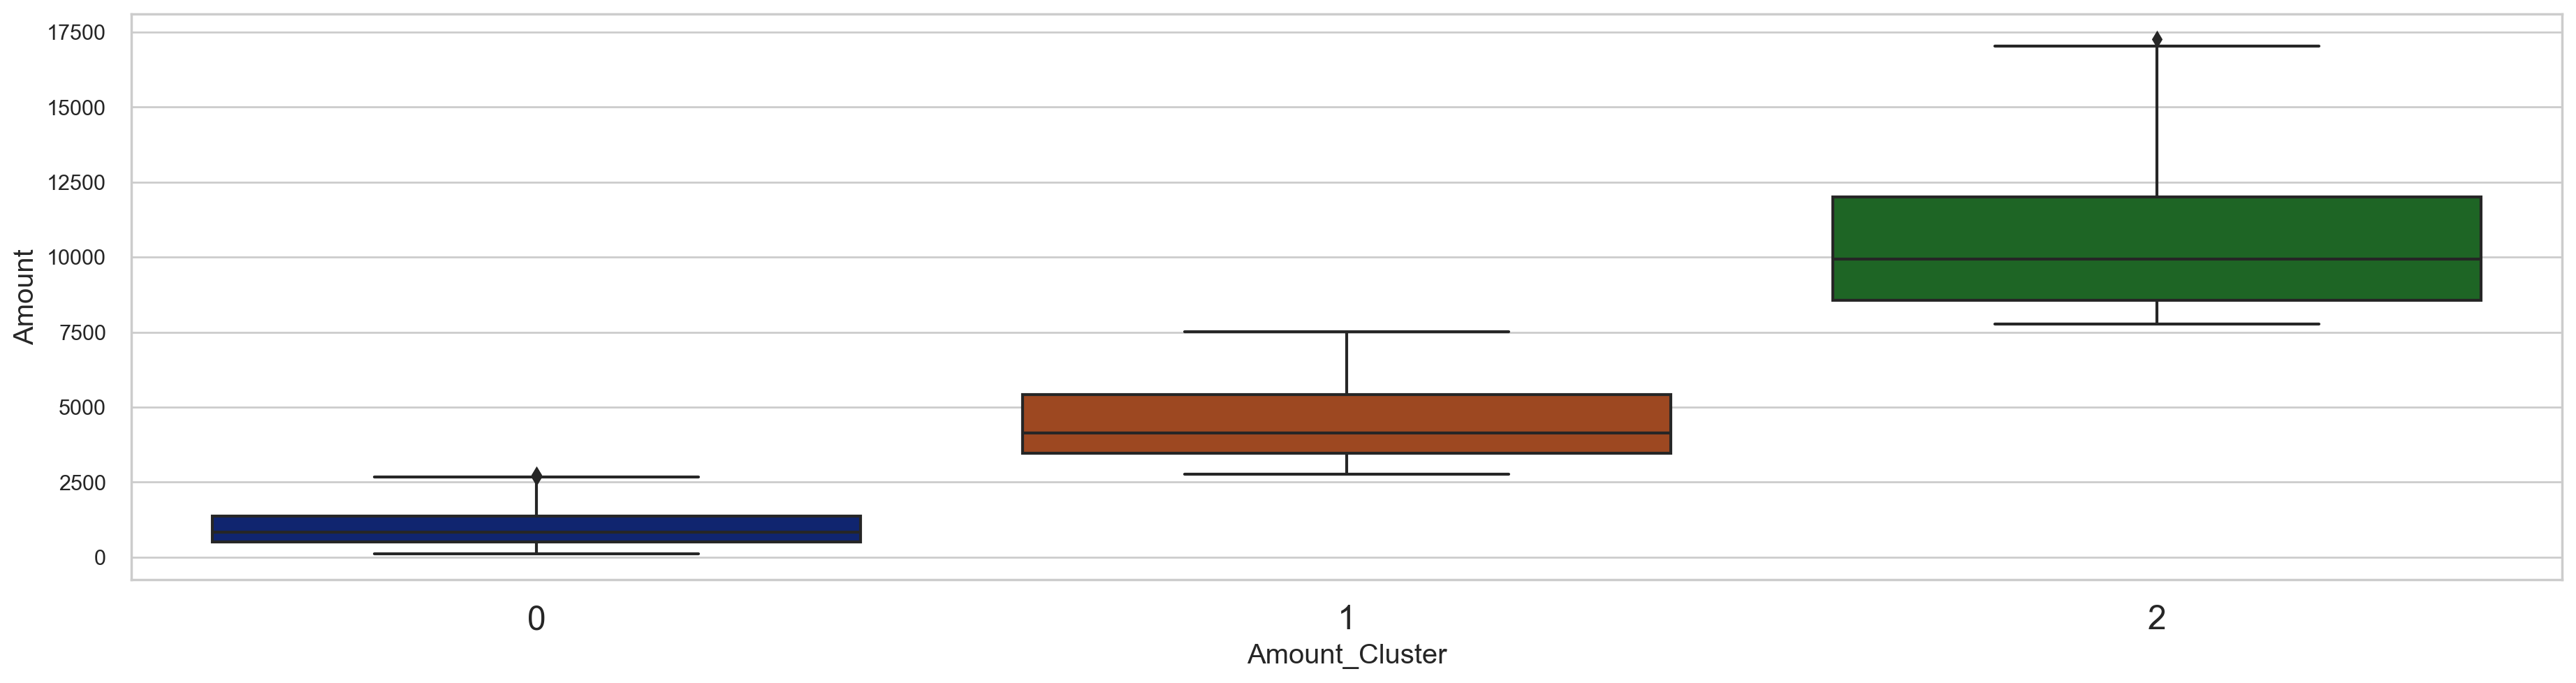

In [159]:
sns.boxplot(x='Amount_Cluster', y='Amount', data=rfm_m1)
plt.show()

In [177]:
cluster_detail_m=rfm_m1.groupby('Amount_Cluster').mean().reset_index()
cluster_detail_m['Number_of_User']=rfm_m1.groupby('Amount_Cluster')['Email'].count()
cluster_detail_m.rename(columns={'Amount':'Mean_Amount'},inplace=True)
cluster_detail_m

Amount_Cluster   Mean_Amount  Number_of_User
0               0   1011.513291            1091
1               1   4518.864706             170
2               2  10767.319149              47

/Users/fakhruddinhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/fakhruddinhussain/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


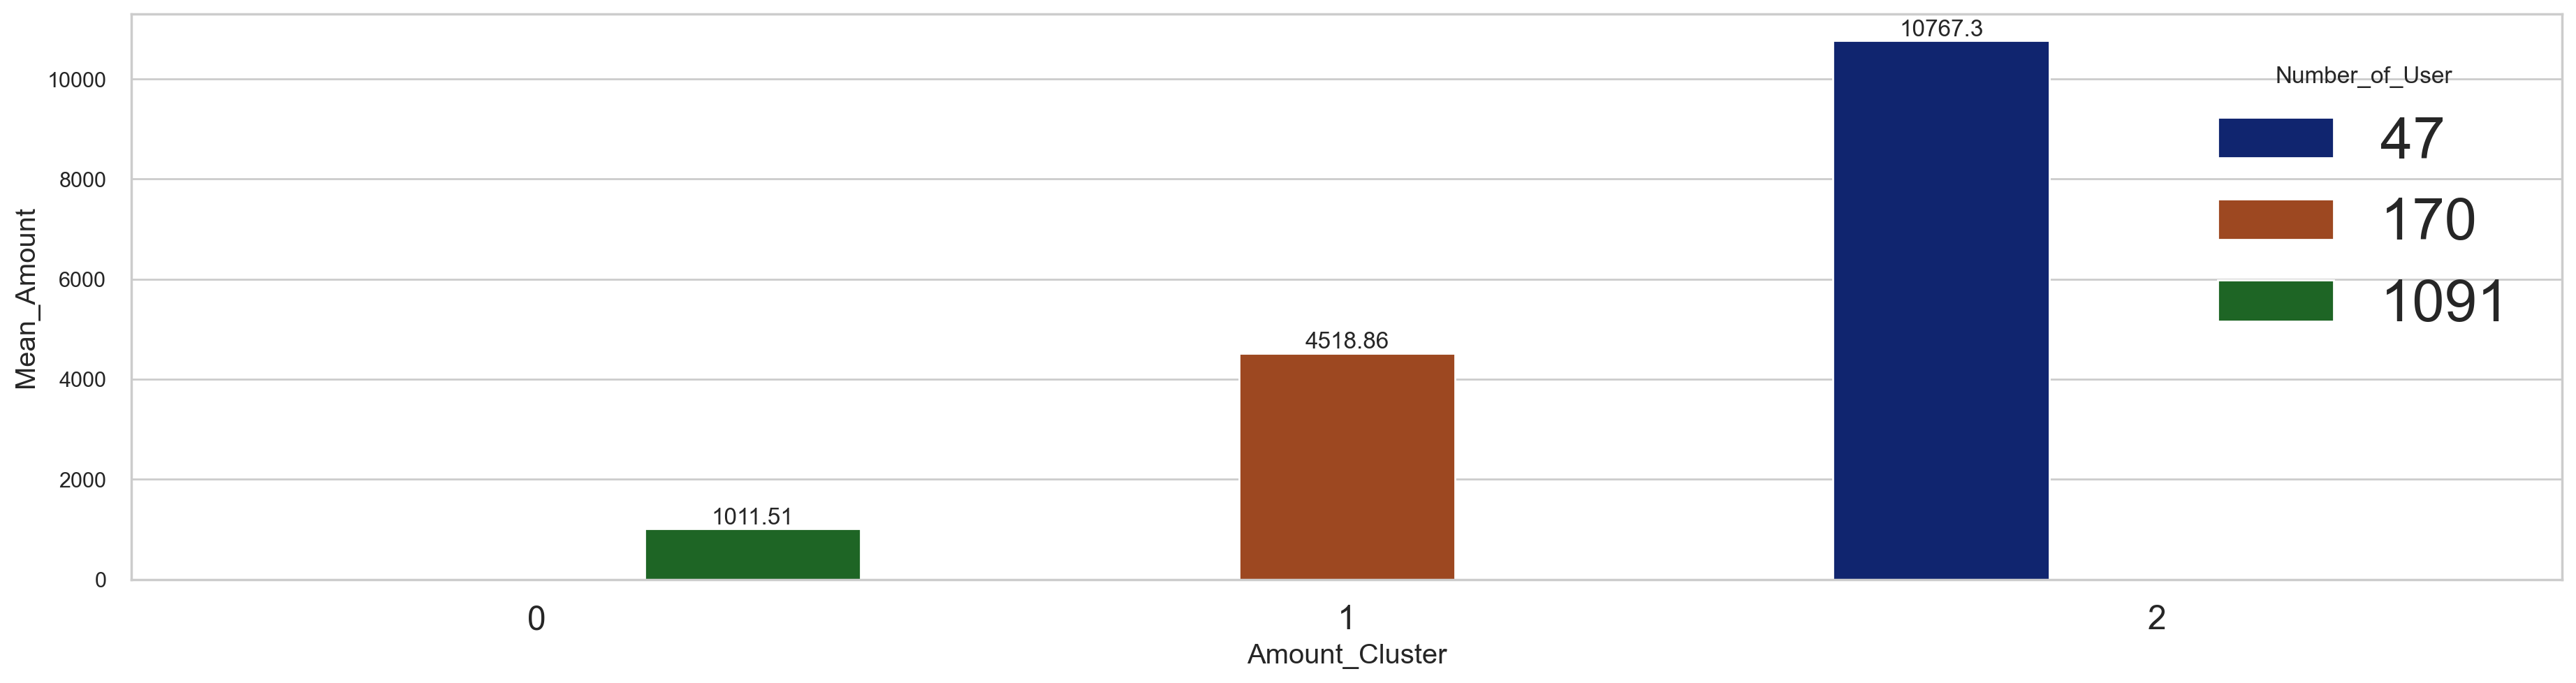

In [178]:
ax=sns.barplot(x='Amount_Cluster',y='Mean_Amount',data=cluster_detail_m,hue='Number_of_User')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()

# Making clusters for Frequency

In [207]:
rfm_f1=rfm[['Email','Frequency']]
rfm_f1

Email  Frequency
0     '+919176655042@freshkatch.myshopify.com          2
1     '+919442318200@freshkatch.myshopify.com          2
2     '+919740403053@freshkatch.myshopify.com          2
3     '+919840792580@freshkatch.myshopify.com          2
4     '+919884400714@freshkatch.myshopify.com          1
...                                       ...        ...
1320                 yogeshmsc.apps@gmail.com         12
1321                       yohainfo@gmail.com         11
1322                     yuvaarch97@gmail.com          7
1323                      zaiddroid@gmail.com          1
1324                        zoe8081@gmail.com          2

[1308 rows x 2 columns]

In [208]:
rfm_f_df = rfm_f1['Frequency']
rfm_f_df.head()

0    2
1    2
2    2
3    2
4    1
Name: Frequency, dtype: int64

In [209]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_f_df.values.reshape(-1,1))

KMeans(n_clusters=3)

In [210]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [211]:
# assign the label
rfm_f1['Frequency_Cluster'] = kmeans.labels_
rfm_f1.head()

Email  Frequency  Frequency_Cluster
0  '+919176655042@freshkatch.myshopify.com          2                  0
1  '+919442318200@freshkatch.myshopify.com          2                  0
2  '+919740403053@freshkatch.myshopify.com          2                  0
3  '+919840792580@freshkatch.myshopify.com          2                  0
4  '+919884400714@freshkatch.myshopify.com          1                  0

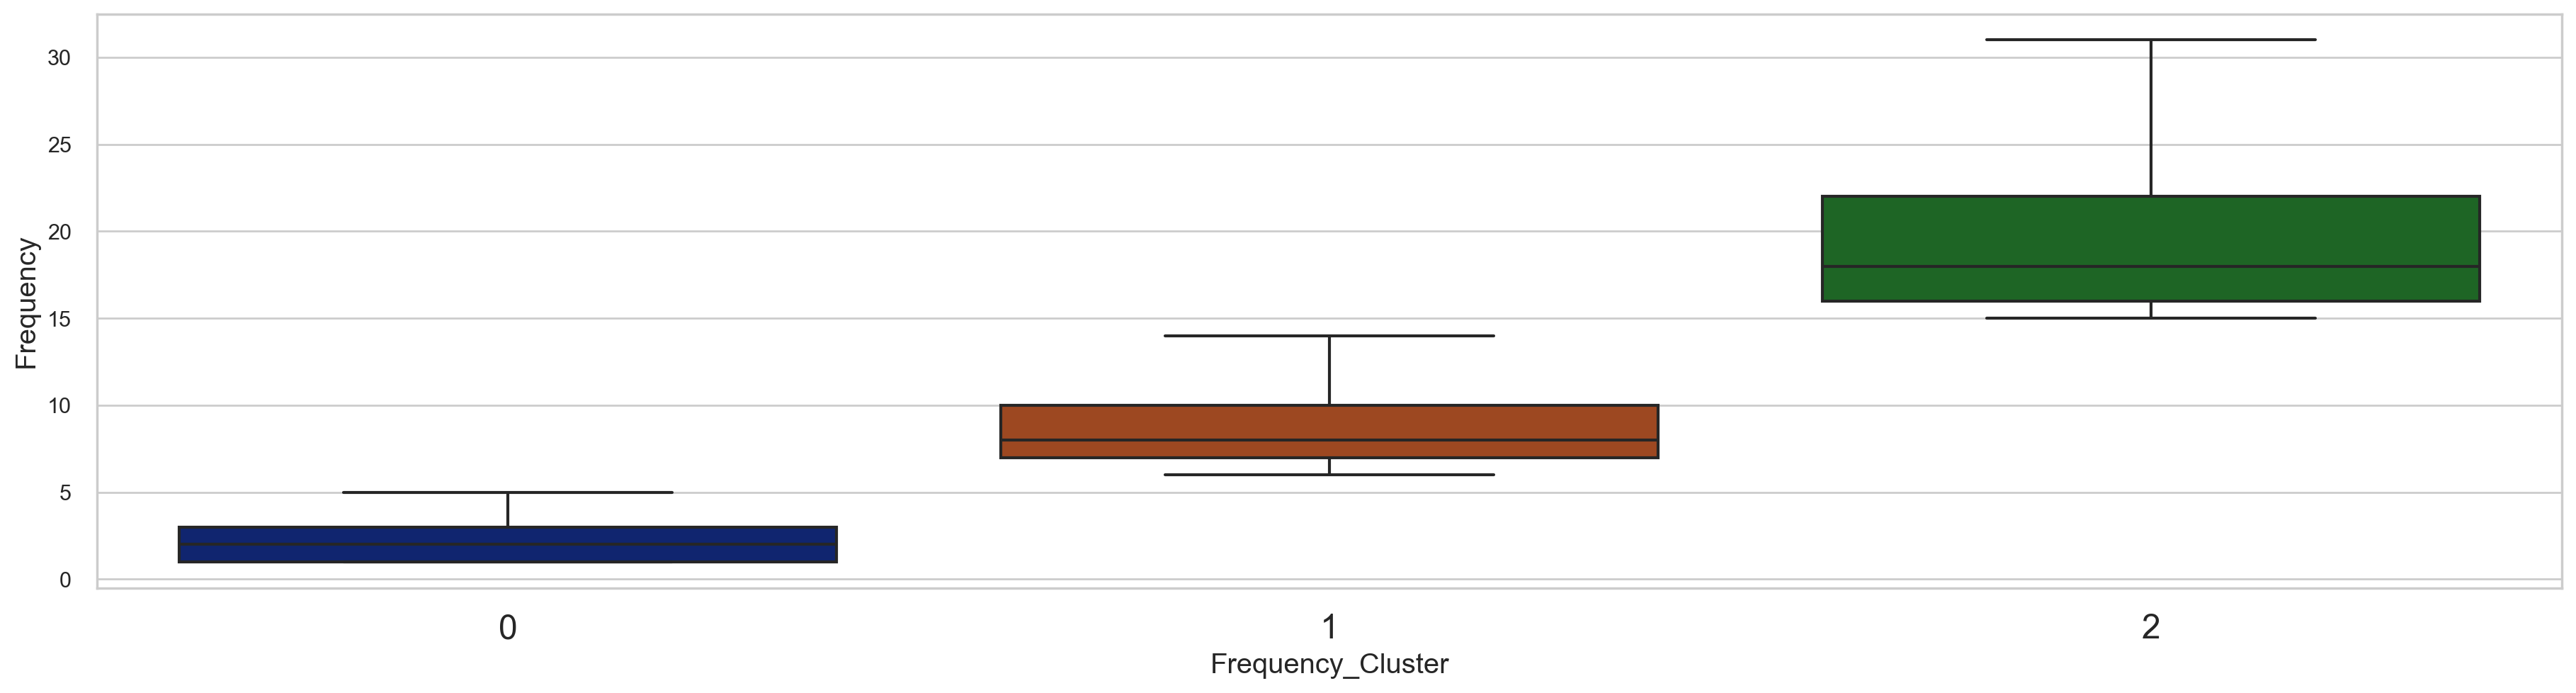

In [212]:
sns.boxplot(x='Frequency_Cluster', y='Frequency', data=rfm_f1)
plt.show()

In [213]:
cluster_detail_f=rfm_f1.groupby('Frequency_Cluster').mean().reset_index()
cluster_detail_f['Number_of_User']=rfm_f1.groupby('Frequency_Cluster')['Email'].count()
cluster_detail_f.rename(columns={'Frequency':'Mean_Frequency'},inplace=True)
cluster_detail_f

Frequency_Cluster  Mean_Frequency  Number_of_User
0                  0        2.142857            1064
1                  1        8.654450             191
2                  2       19.528302              53

/Users/fakhruddinhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/fakhruddinhussain/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


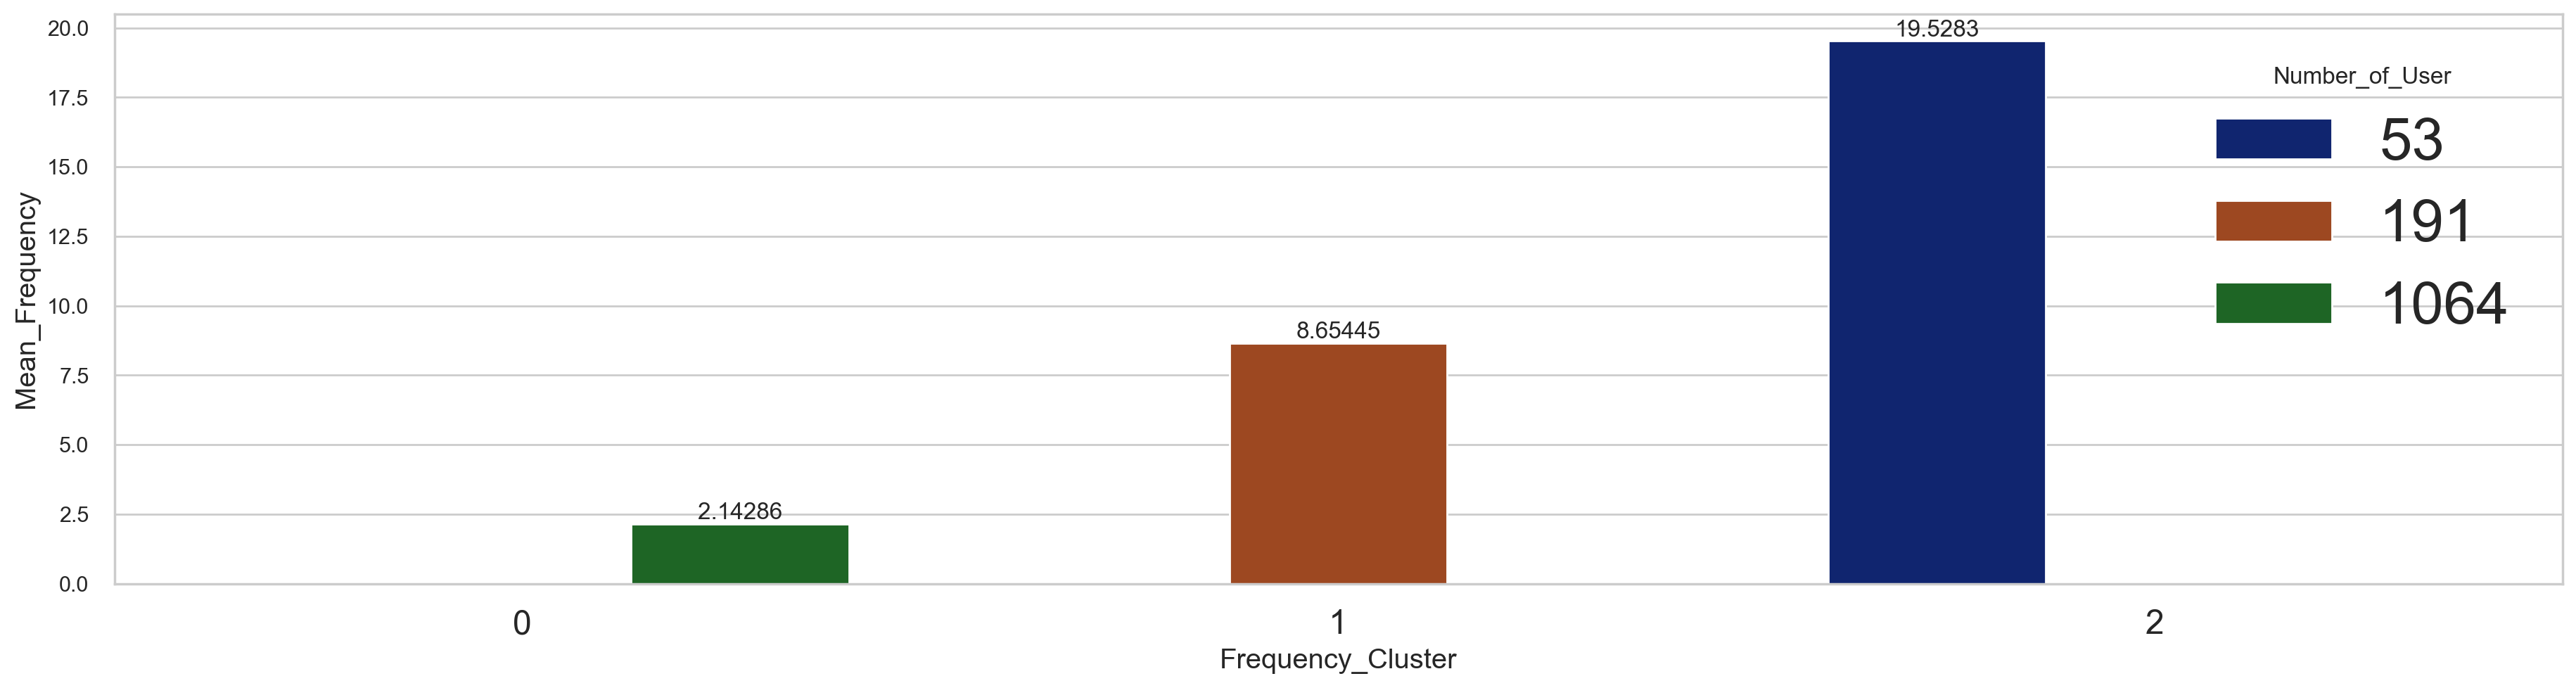

In [214]:
ax=sns.barplot(x='Frequency_Cluster',y='Mean_Frequency',data=cluster_detail_f,hue='Number_of_User')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()

# Making clusters for Recency

In [263]:
rfm_p1=rfm[['Email','Recency']]
rfm_p1=rfm_p1.sort_values(by='Recency',ascending=False)
rfm_p1

Email  Recency
997          sashisubra@yahoo.in      340
1273     vijayasrithar@gmail.com      340
1088   smartarunbalaji@gmail.com      340
647    mkarthikbiotech@gmail.com      339
1252           vdarsan@gmail.com      339
...                          ...      ...
313     drrameshskumar@gmail.com        0
280          deepu0018@gmail.com        0
223       chairtable92@gmail.com        0
1263  vidhya.aravindan@gmail.com        0
663        mosesbenina@gmail.com        0

[1308 rows x 2 columns]

In [264]:
rfm_p_df = rfm_p1['Recency']
rfm_p_df.head()

997     340
1273    340
1088    340
647     339
1252    339
Name: Recency, dtype: int64

In [270]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_p_df.values.reshape(-1,1))

KMeans(n_clusters=3)

In [271]:
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [272]:
# assign the label
rfm_p1['Recency_Cluster'] = kmeans.labels_
rfm_p1.head()

Email  Recency  Recency_Cluster
997         sashisubra@yahoo.in      340                0
1273    vijayasrithar@gmail.com      340                0
1088  smartarunbalaji@gmail.com      340                0
647   mkarthikbiotech@gmail.com      339                0
1252          vdarsan@gmail.com      339                0

<AxesSubplot:xlabel='Recency_Cluster', ylabel='Recency'>

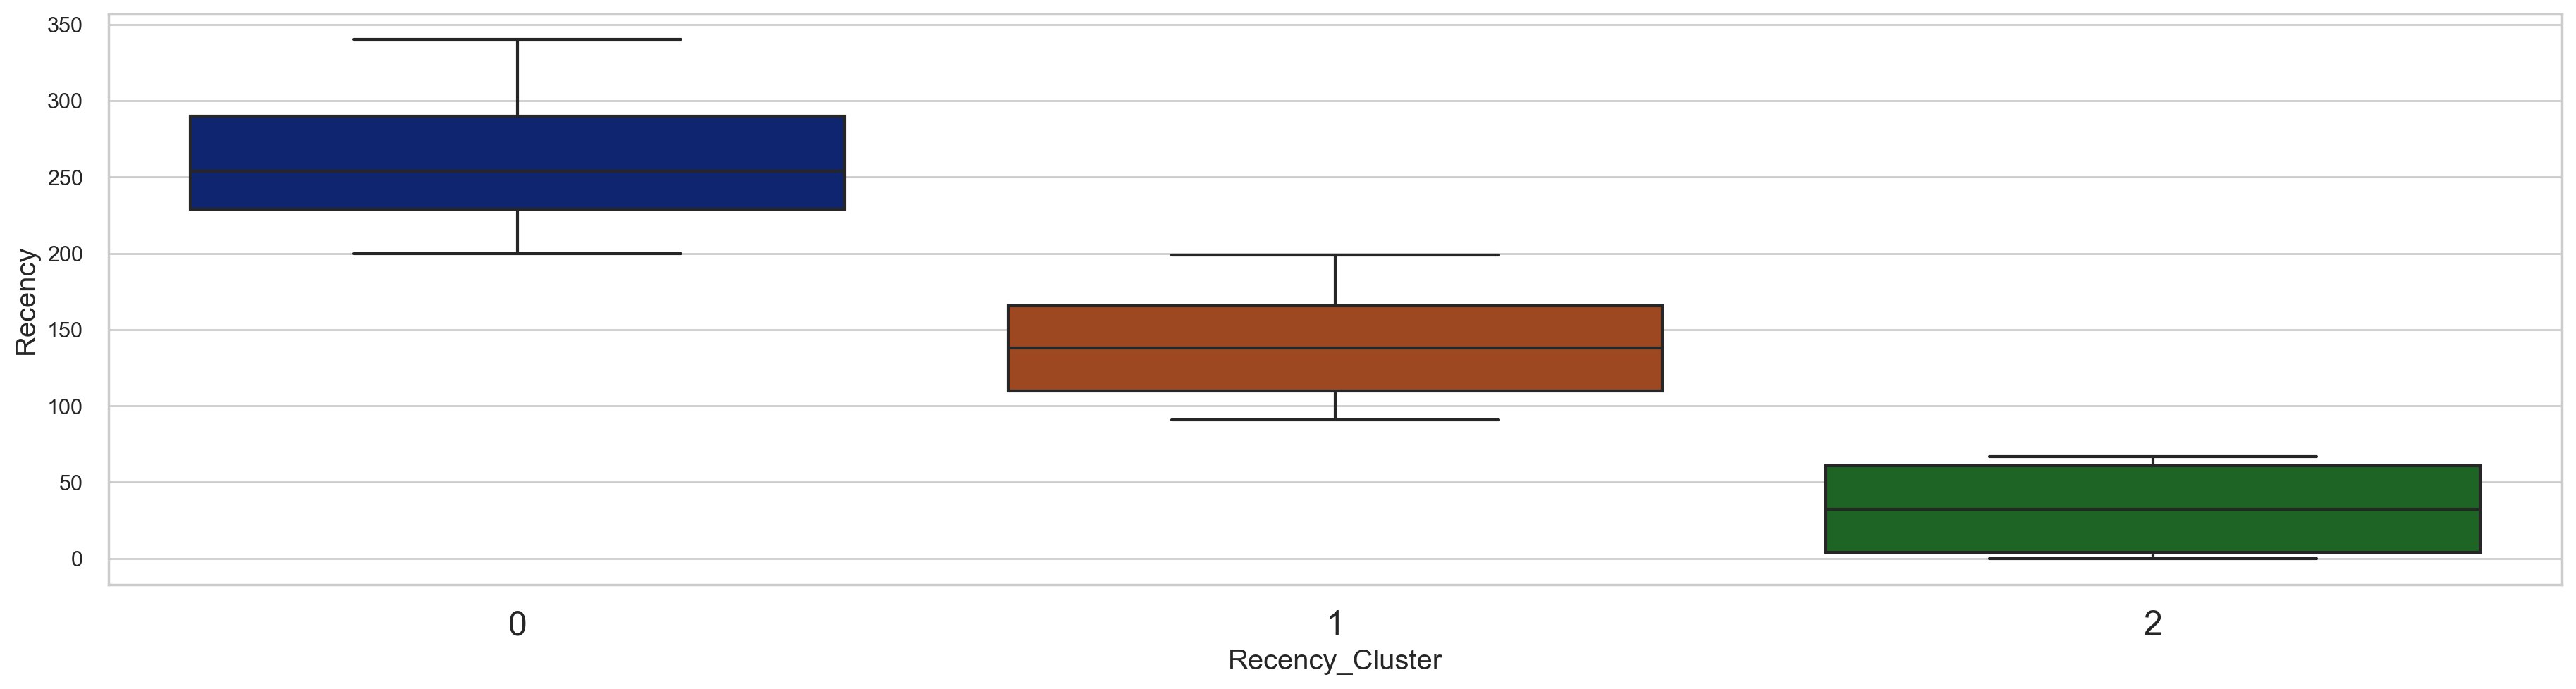

In [273]:
sns.boxplot(x='Recency_Cluster', y='Recency', data=rfm_p1)

In [274]:
cluster_detail_p=rfm_p1.groupby('Recency_Cluster').mean().reset_index()
cluster_detail_p['Number_of_User']=rfm_p1.groupby('Recency_Cluster')['Email'].count()
cluster_detail_p.rename(columns={'Recency':'Mean_Recency'},inplace=True)
cluster_detail_p

Recency_Cluster  Mean_Recency  Number_of_User
0                0    260.394004             467
1                1    139.477049             610
2                2     28.683983             231

/Users/fakhruddinhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/fakhruddinhussain/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


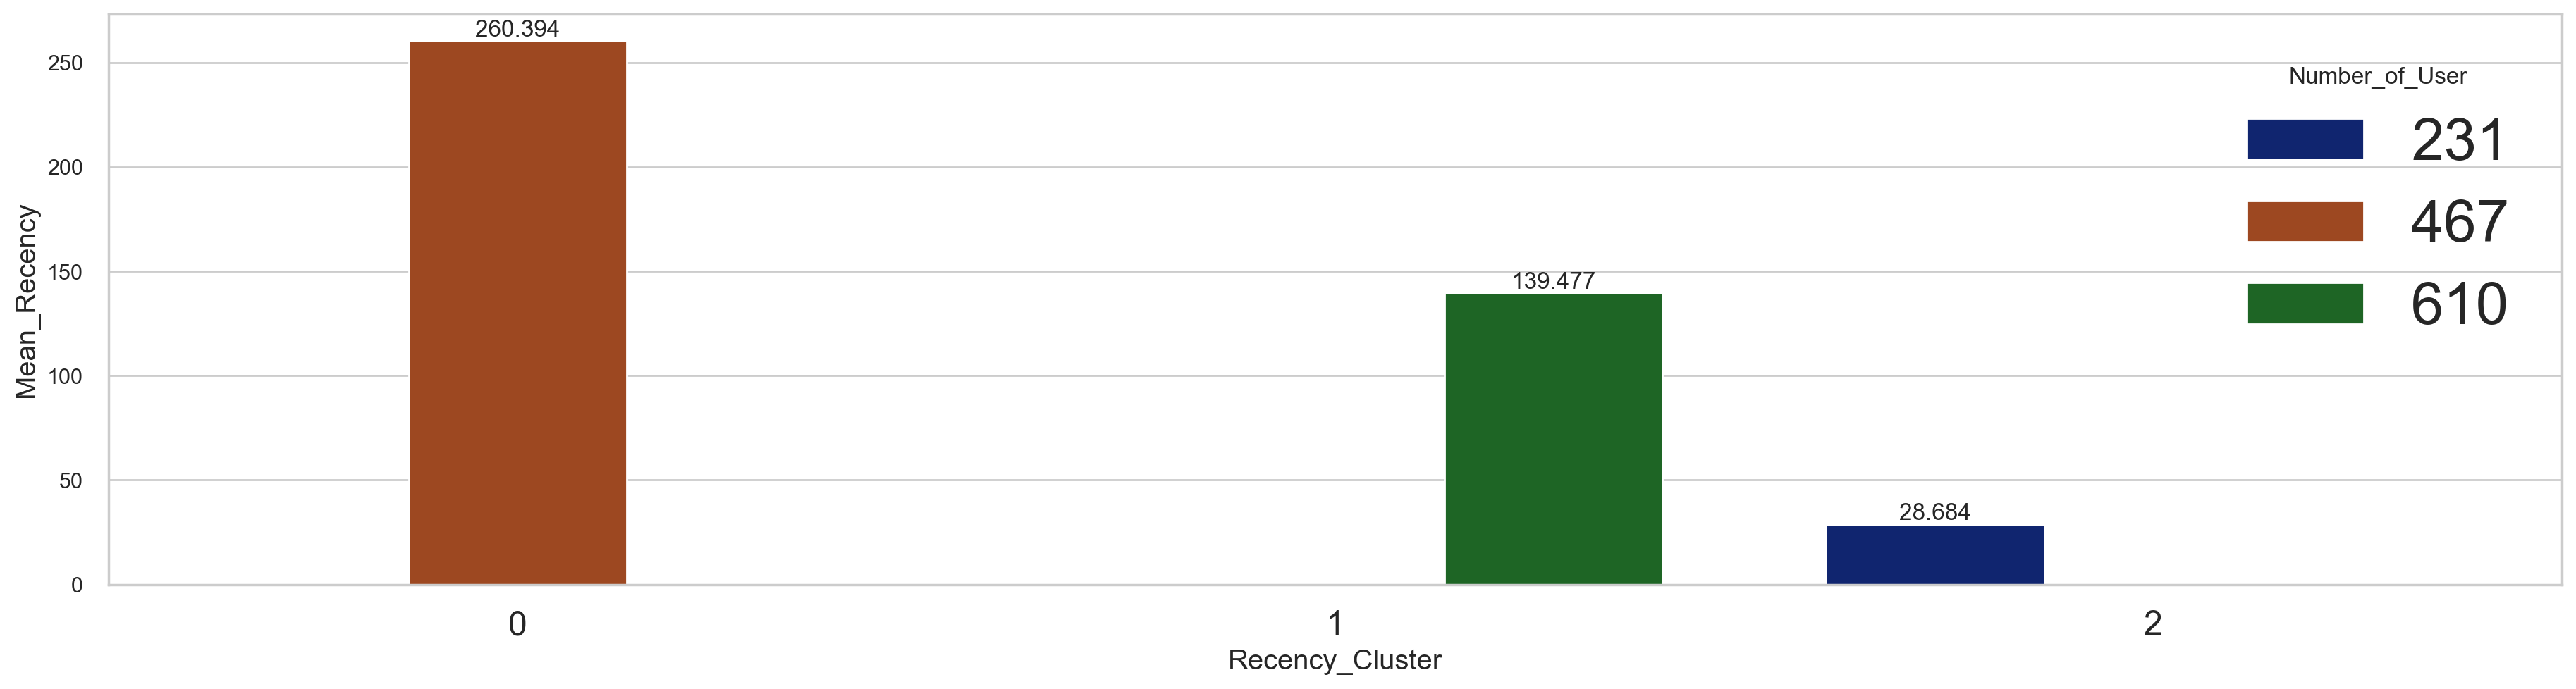

In [275]:
ax=sns.barplot(x='Recency_Cluster',y='Mean_Recency',data=cluster_detail_p,hue='Number_of_User')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()

In [143]:
rfm_clustered=pd.merge(rfm_m1,rfm_f1,on='Email',how='inner')
rfm_clustered=pd.merge(rfm_clustered,rfm_p1,on='Email',how='inner')

In [149]:
rfm_clustered=rfm_clustered[['Email','Amount','Frequency','Recency','Amount_Cluster','Frequency_Cluster','Recency_Cluster']]
rfm_clustered

Email  Amount  Frequency  Recency  \
0     '+919176655042@freshkatch.myshopify.com     825          2      107   
1     '+919442318200@freshkatch.myshopify.com     620          2      238   
2     '+919740403053@freshkatch.myshopify.com     815          2      230   
3     '+919840792580@freshkatch.myshopify.com    1325          2      214   
4     '+919884400714@freshkatch.myshopify.com     330          1      111   
...                                       ...     ...        ...      ...   
1303                 yogeshmsc.apps@gmail.com    6285         12      104   
1304                       yohainfo@gmail.com    5900         11      108   
1305                     yuvaarch97@gmail.com    2609          7      214   
1306                      zaiddroid@gmail.com    1400          1      244   
1307                        zoe8081@gmail.com    1330          2      117   

      Amount_Cluster  Frequency_Cluster  Recency_Cluster  
0                  0                  0                2  
1                  0                  0                1  
2                  0                  0                1  
3                  0                  0                1  
4                  0                  0                2  
...              ...                ...              ...  
1303               1                  2                2  
1304               1                  2                2  
1305               0                  2                1  
1306               0                  0                1  
1307               0                  0                2  

[1308 rows x 7 columns]

# Making Clusters of based on each Recency Frequency and Monetary attributes of customers separating the elements into Bins

In [368]:
customer_details=rfm.copy()

In [279]:
customer_details.head()

Email  Amount  Frequency  Recency
0  '+919176655042@freshkatch.myshopify.com     825          2      107
1  '+919442318200@freshkatch.myshopify.com     620          2      238
2  '+919740403053@freshkatch.myshopify.com     815          2      230
3  '+919840792580@freshkatch.myshopify.com    1325          2      214
4  '+919884400714@freshkatch.myshopify.com     330          1      111

In [535]:
customer_details['Amount_cluster'] = pd.cut(customer_details['Amount'], 3, labels=False)
customer_details['Frequency_cluster'] = pd.cut(customer_details['Frequency'], 3, labels=False,duplicates='drop')
customer_details['Recency_cluster'] = pd.cut(customer_details['Recency'], 3, labels=False)

In [349]:
customer_details.groupby('Amount_cluster')['Email'].count()

Amount_cluster
0    1226
1      67
2      15
Name: Email, dtype: int64

In [350]:
customer_details.groupby('Amount_cluster')['Amount'].mean()

Amount_cluster
0     1338.924959
1     7836.089552
2    14086.133333
Name: Amount, dtype: float64

In [351]:
customer_details.groupby('Frequency_cluster')['Email'].count()

Frequency_cluster
0    1230
1      62
2      16
Name: Email, dtype: int64

In [352]:
customer_details.groupby('Frequency_cluster')['Frequency'].mean()

Frequency_cluster
0     2.936585
1    15.290323
2    25.500000
Name: Frequency, dtype: float64

In [353]:
customer_details.groupby('Recency_cluster')['Email'].count()

Recency_cluster
0    415
1    531
2    362
Name: Email, dtype: int64

In [354]:
customer_details.groupby('Recency_cluster')['Recency'].mean()

Recency_cluster
0     61.715663
1    166.730697
2    273.936464
Name: Recency, dtype: float64

In [536]:
lost_cheap_customers=customer_details.loc[(customer_details.Amount_cluster==0) & (customer_details.Frequency_cluster==0)& (customer_details.Recency_cluster==2)]
lost_cheap_customers


Email  Amount  Frequency  Recency  \
1     '+919442318200@freshkatch.myshopify.com     620          2      238   
2     '+919740403053@freshkatch.myshopify.com     815          2      230   
7     '+919994974899@freshkatch.myshopify.com     350          1      265   
14                 Chellam.ramasamy@gmail.com     165          1      302   
18                         JaaSheik@gmail.com     530          1      286   
...                                       ...     ...        ...      ...   
1305                 vrindakundapur@gmail.com     315          1      311   
1307                   vsumathy.bdu@gmail.com     815          3      285   
1310                wcvijayakumar17@gmail.com     615          2      261   
1315                      yahanaz@outlook.com     510          1      318   
1323                      zaiddroid@gmail.com    1400          1      244   

      Amount_cluster  Frequency_cluster  Recency_cluster  
1                  0                  0                2  
2                  0                  0                2  
7                  0                  0                2  
14                 0                  0                2  
18                 0                  0                2  
...              ...                ...              ...  
1305               0                  0                2  
1307               0                  0                2  
1310               0                  0                2  
1315               0                  0                2  
1323               0                  0                2  

[359 rows x 7 columns]

In [543]:
best_customers=customer_details.loc[(customer_details.Amount_cluster==2) & (customer_details.Frequency_cluster==2)& (customer_details.Recency_cluster==0)]
best_customers


Email  Amount  Frequency  Recency  Amount_cluster  \
100   anishm_1234@yahoo.co.in   16079         28       32               2   
298    dr.geetha.rk@gmail.com   16505         22        5               2   
580     maha2008.hr@gmail.com   12795         25       32               2   
900     rithikanand@gmail.com   11630         31        3               2   
1194      tdashok@hotmail.com   15600         27        0               2   

      Frequency_cluster  Recency_cluster  
100                   2                0  
298                   2                0  
580                   2                0  
900                   2                0  
1194                  2                0

In [357]:
active_customers=customer_details.loc[(customer_details.Amount_cluster==0) & (customer_details.Frequency_cluster==0)& (customer_details.Recency_cluster==0)]
active_customers

Email  Amount  Frequency  Recency  \
0     '+919176655042@freshkatch.myshopify.com     825          2      107   
4     '+919884400714@freshkatch.myshopify.com     330          1      111   
5     '+919987400070@freshkatch.myshopify.com    1230          3      106   
10                           98josh@gmail.com    1100          2       64   
22                     Sindhu.aries@gmail.com     680          3        0   
...                                       ...     ...        ...      ...   
1313       writetosaravananramkumar@gmail.com     299          1      104   
1314          www.vasukisureshkumar@gmail.com     375          1        0   
1316                yalinisenthil02@gmail.com     535          2        5   
1318                    yemkarthikk@yahoo.com     480          1       95   
1319                    yogaraj1111@gmail.com    1210          3       36   

      Amount_cluster  Frequency_cluster  Recency_cluster  
0                  0                  0                0  
4                  0                  0                0  
5                  0                  0                0  
10                 0                  0                0  
22                 0                  0                0  
...              ...                ...              ...  
1313               0                  0                0  
1314               0                  0                0  
1316               0                  0                0  
1318               0                  0                0  
1319               0                  0                0  

[352 rows x 7 columns]

In [367]:
about_to_churn_loyalist=customer_details.loc[(customer_details.Amount_cluster==1) & (customer_details.Frequency_cluster==2)& (customer_details.Recency_cluster==1)]
about_to_churn_loyalist

Email  Amount  Frequency  Recency  Amount_cluster  \
33   abhinayakishore23@gmail.com    9750         24      139               1   
134        arun6633.sk@gmail.com    9330         25      126               1   
215             bshk16@gmail.com   10400         24      116               1   
707      navinmurali28@gmail.com    9737         27      165               1   
935   s.p.premmohana97@gmail.com    9715         22      138               1   

     Frequency_cluster  Recency_cluster  
33                   2                1  
134                  2                1  
215                  2                1  
707                  2                1  
935                  2                1

In [544]:
loyal_customer=customer_details.loc[(customer_details.Amount_cluster==1) & (customer_details.Frequency_cluster==1)& (customer_details.Recency_cluster==1)]
loyal_customer


Email  Amount  Frequency  Recency  \
181       balajisayshello@gmail.com    9270         21      131   
306              drksderm@gmail.com    8415         15      114   
334           eugenealexj@gmail.com    8330         17      123   
413             honeypav1@gmail.com    7164         15      132   
467              johnmelt@gmail.com    6385         14      208   
729             nskpillai@gmail.com    7075         13      156   
749         paulkodiyan@hotmail.com    6535         15      157   
773          prabhakhar75@gmail.com    6844         15      143   
791   prathabanpackiamani@gmail.com    8100         16      224   
811       priyaprasad2510@gmail.com    8355         13      123   
941         sabarishree10@gmail.com    6215         16      215   
1120      sreeramsingaram@gmail.com    9300         12      155   
1128            sriniaabs@gmail.com    8675         14      174   

      Amount_cluster  Frequency_cluster  Recency_cluster  
181                1                  1                1  
306                1                  1                1  
334                1                  1                1  
413                1                  1                1  
467                1                  1                1  
729                1                  1                1  
749                1                  1                1  
773                1                  1                1  
791                1                  1                1  
811                1                  1                1  
941                1                  1                1  
1120               1                  1                1  
1128               1                  1                1

In [361]:
High_Margin_contributors=customer_details.loc[(customer_details.Amount_cluster==2) & (customer_details.Frequency_cluster==0)& (customer_details.Recency_cluster==2)]
High_Margin_contributors


Email  Amount  Frequency  Recency  Amount_cluster  \
517  khalid.ahmedb@gmail.com   15040          5      264               2   

     Frequency_cluster  Recency_cluster  
517                  0                2

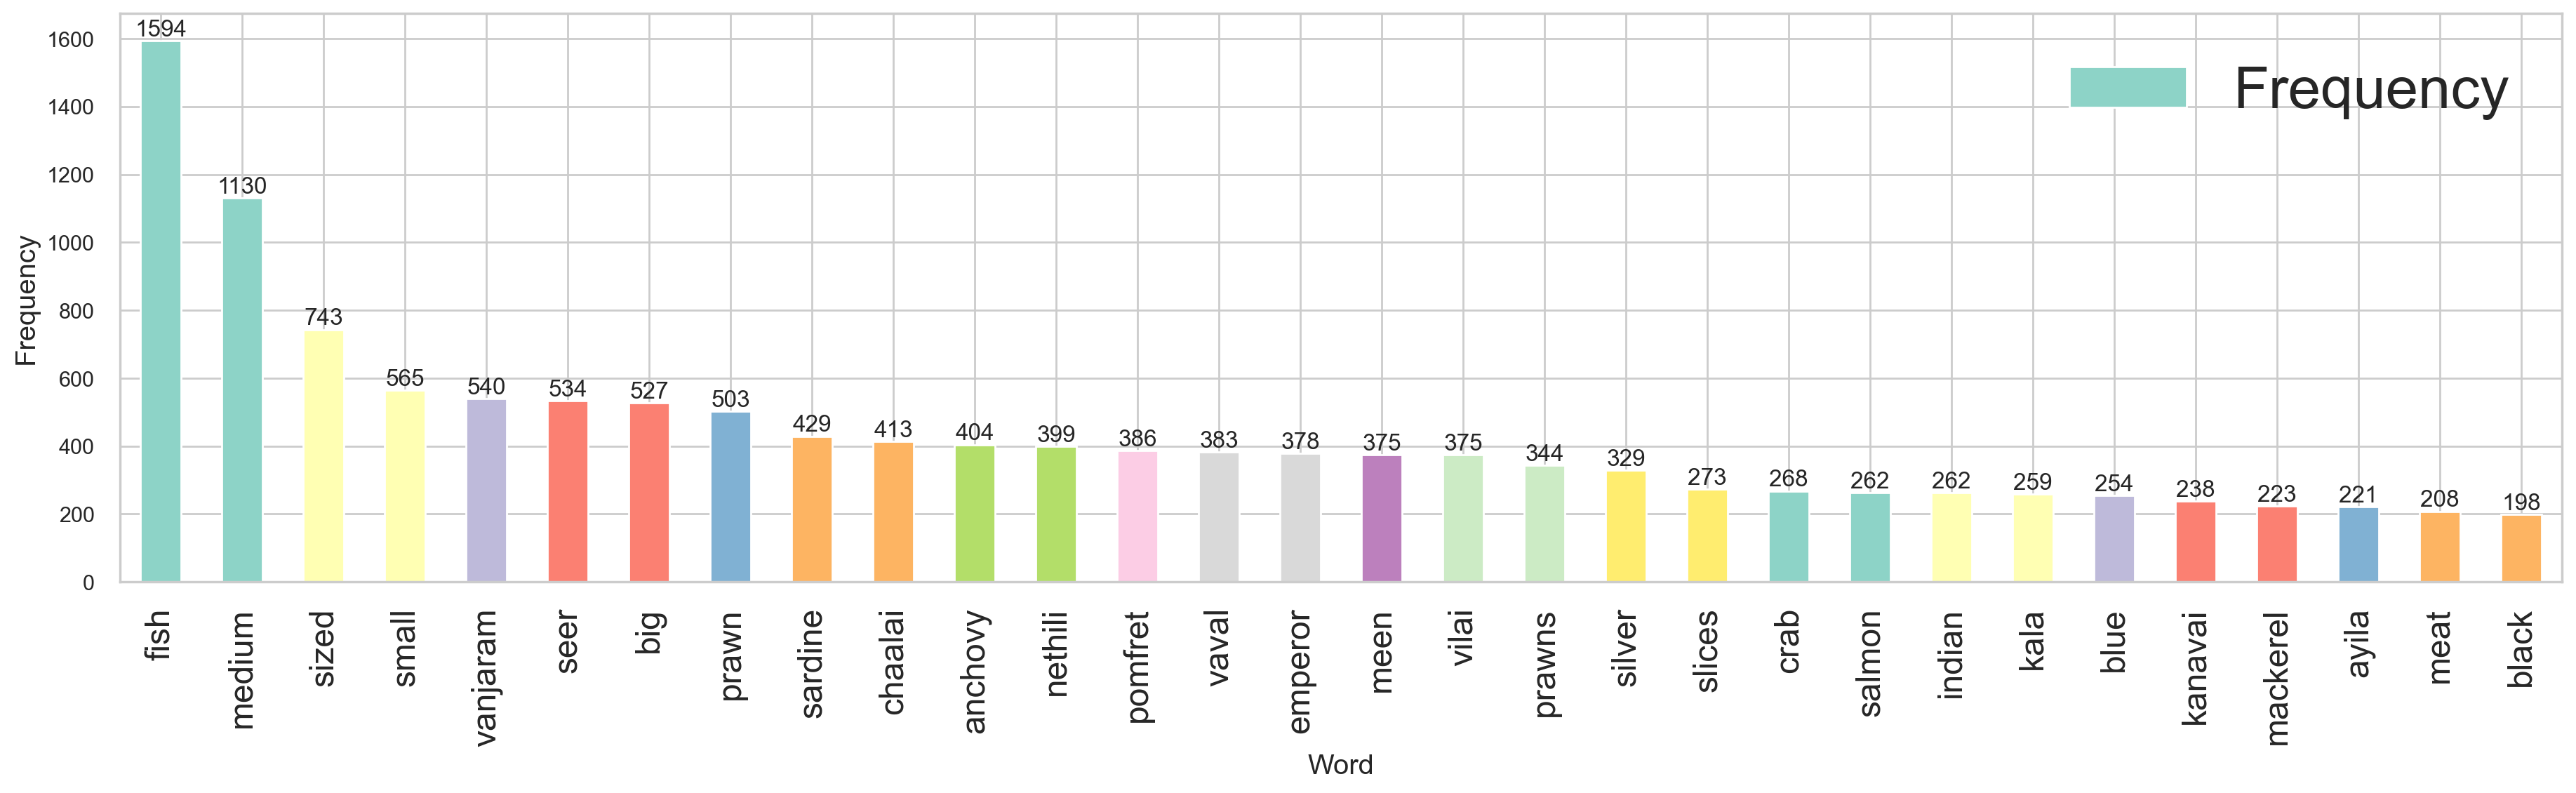

In [556]:
z=pd.DataFrame()
z['Fish_name'] = order['Fish_name'].str.lower()
a = z['Fish_name'].str.cat(sep=" ")
words = nltk.tokenize.word_tokenize(a)
words = [word for (word, pos) in nltk.pos_tag(words) if pos[:]!='(' and pos[:] !=')']

word_dist = nltk.FreqDist(words)
words = pd.DataFrame(word_dist.items(), columns=['Word', 'Frequency'])
words.sort_values(by='Frequency', ascending=False, inplace=True)
words=words.loc[(words.Word!="|")&(words.Word!="size")]
colors = cm.get_cmap('Set3', 20).colors
ax=words[['Word','Frequency']].head(30).plot.bar(x='Word', y='Frequency', rot=90, color=colors)
ax.bar_label(ax.containers[0])
plt.ylabel('Frequency')
plt.show()

Bar plot showing frequency of the words

In [558]:
words

Word  Frequency
1         fish       1594
2       medium       1130
18       sized        743
21       small        565
17    vanjaram        540
..         ...        ...
57       queen          2
117          /          2
118  பூங்குழலி          2
119       மீன்          2
120      slice          2

[119 rows x 2 columns]

In [559]:
# words.to_excel("words_frequency.xlsx")

In [375]:
df_sample = order['Fish_name'].sample(frac=0.5, random_state=1).reset_index()
df_sample.head()

index                    Fish_name
0   4075  Seer Fish Slices | Vanjaram
1    116            Anchovy | Nethili
2   2112   Romeo (Big Size) | Sankara
3   5424  Seer Fish Slices | Vanjaram
4   3602        Red Snapper | Seppili

In [376]:
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, max_features=1000)
X = vectorizer.fit_transform(df_sample['Fish_name'])

In [377]:
vectorizer

TfidfVectorizer(max_features=1000, stop_words='english')

In [378]:
n_clusters = 5
kmeans_model = KMeans(n_clusters=n_clusters, random_state=0)
kmeans_model.fit(X)

KMeans(n_clusters=5, random_state=0)

Top 20 terms per cluster


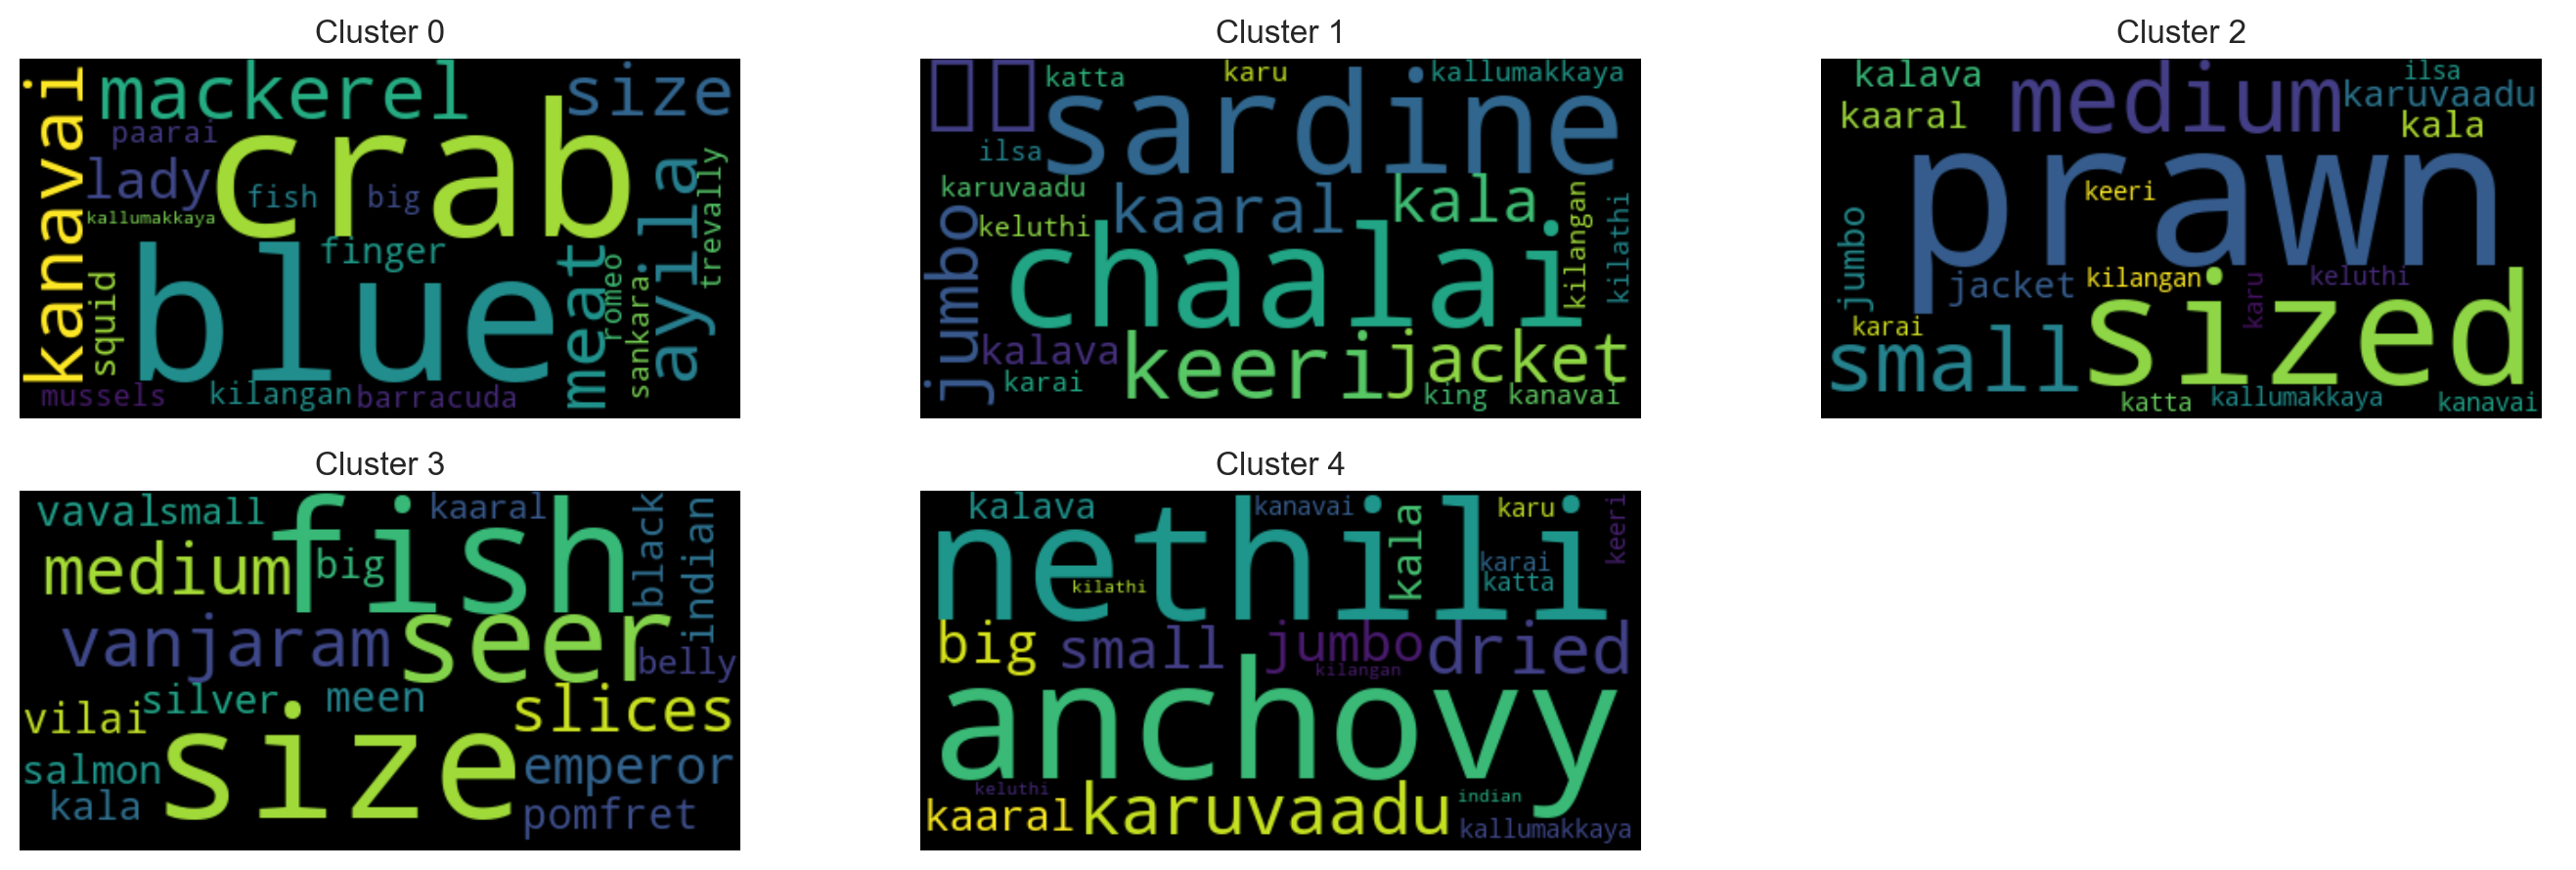

In [379]:
def generate_plot(ax, text, max_words=1000):
    wordcloud = WordCloud(max_words=max_words).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    return ax
# get the clusters centers and order them 
# .argsort()[:, ::-1] line converts each centroid into a sorted
# list of the columns most relevant words 
top_n = 20
print("Top {} terms per cluster".format(top_n))
centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
feature_names = vectorizer.get_feature_names()
n = int(n_clusters/2) +1
fig, axs = plt.subplots(2, n, figsize=(15,5))
x = 0
y = 0
terms_vectorize = np.vectorize(lambda x: feature_names[x])
for i in range(n_clusters):
    text = " ".join(word for word in terms_vectorize(centroids[i, :top_n]))
    axs[x,y] = generate_plot(axs[x,y], text, 100)
    axs[x,y].set_title("Cluster " + str(i))
    y_aux = (y+1)%n
    if (y_aux < y):
        x = (x+1)%2
    y = y_aux

for ax in axs:
    for d in ax:
        d.axis("off")
plt.show()    

In [380]:
print("Find cluster for product ", order['Fish_name'][0])
prediction = kmeans_model.predict(vectorizer.transform([order['Fish_name'][0]]))
print('Assigned cluster ', prediction)

Find cluster for product  Emperor Fish (Medium Size) | Vilai Meen
Assigned cluster  [3]


Wordcloud for the entire set of SKU's

In [523]:
# z1=pd.DataFrame()
# z1['Fish_name'] = order['Fish_name'].str.lower()
# a1 = z1['Fish_name'].str.cat(sep=" ")
# wordcloud1=WordCloud(stopwords=STOPWORDS, max_words=50).generate(a1)
# plt.figure(figsize=(5,5))
# plt.clf()
# plt.imshow(wordcloud1)
# plt.axis('off')
# plt.show()

# Lost Cheap Customers

In [549]:
lost_cheap_customers

Email  Amount  Frequency  Recency  \
1     '+919442318200@freshkatch.myshopify.com     620          2      238   
2     '+919740403053@freshkatch.myshopify.com     815          2      230   
7     '+919994974899@freshkatch.myshopify.com     350          1      265   
14                 Chellam.ramasamy@gmail.com     165          1      302   
18                         JaaSheik@gmail.com     530          1      286   
...                                       ...     ...        ...      ...   
1305                 vrindakundapur@gmail.com     315          1      311   
1307                   vsumathy.bdu@gmail.com     815          3      285   
1310                wcvijayakumar17@gmail.com     615          2      261   
1315                      yahanaz@outlook.com     510          1      318   
1323                      zaiddroid@gmail.com    1400          1      244   

      Amount_cluster  Frequency_cluster  Recency_cluster  
1                  0                  0                2  
2                  0                  0                2  
7                  0                  0                2  
14                 0                  0                2  
18                 0                  0                2  
...              ...                ...              ...  
1305               0                  0                2  
1307               0                  0                2  
1310               0                  0                2  
1315               0                  0                2  
1323               0                  0                2  

[359 rows x 7 columns]

In [550]:
# lost_cheap_customers.to_excel("lost_cheap_customers.xlsx")

In [538]:
g1=pd.merge(lost_cheap_customers['Email'],order[['Email','Fish_name']],on='Email',how='inner')
g1

Email  \
0    '+919442318200@freshkatch.myshopify.com   
1    '+919442318200@freshkatch.myshopify.com   
2    '+919740403053@freshkatch.myshopify.com   
3    '+919740403053@freshkatch.myshopify.com   
4    '+919994974899@freshkatch.myshopify.com   
..                                       ...   
691                   vsumathy.bdu@gmail.com   
692                wcvijayakumar17@gmail.com   
693                wcvijayakumar17@gmail.com   
694                      yahanaz@outlook.com   
695                      zaiddroid@gmail.com   

                                   Fish_name  
0                          Sardine (Chaalai)  
1                          Anchovy | Nethili  
2                           Mackerel | Ayila  
3                         Medium Sized Prawn  
4                Mussels meat | Kallumakkaya  
..                                       ...  
691            Banded Barracuda | Karai Ooli  
692      Black Pomfret (Medium Size) | Vaval  
693                        Sardine (Chaalai)  
694  Emperor Fish (Medium Size) | Vilai Meen  
695                   Lady Finger | Kilangan  

[696 rows x 2 columns]

In [539]:
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, max_features=1000)
X = vectorizer.fit_transform(g1['Fish_name'])
kmeans_model = KMeans(n_clusters=1, random_state=0)
kmeans_model.fit(X)

KMeans(n_clusters=1, random_state=0)

Top 20 terms in cluster


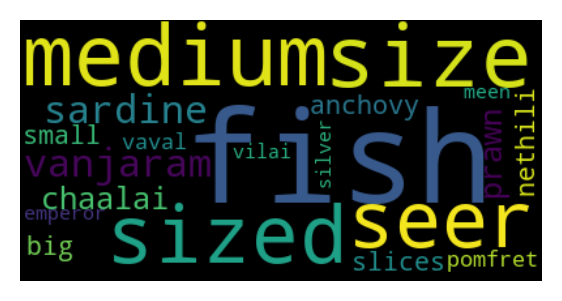

In [542]:
 def generate_plot(text, max_words=1000):
    wordcloud = WordCloud(max_words=max_words).generate(text)
    plt.figure(figsize=(3,3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    return ax
# get the clusters centers and order them 
# .argsort()[:, ::-1] line converts each centroid into a sorted
# list of the columns most relevant words 
top_n = 20
print("Top {} terms in cluster".format(top_n))
centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
feature_names = vectorizer.get_feature_names()
terms_vectorize = np.vectorize(lambda x: feature_names[x])
text = " ".join(word for word in terms_vectorize(centroids[0, :top_n]))
generate_plot(text, 100)
plt.show()

# Best Customers

In [443]:
best_customers

Email  Amount  Frequency  Recency  Amount_cluster  \
100   anishm_1234@yahoo.co.in   16079         28       32               2   
298    dr.geetha.rk@gmail.com   16505         22        5               2   
580     maha2008.hr@gmail.com   12795         25       32               2   
900     rithikanand@gmail.com   11630         31        3               2   
1194      tdashok@hotmail.com   15600         27        0               2   

      Frequency_cluster  Recency_cluster  
100                   2                0  
298                   2                0  
580                   2                0  
900                   2                0  
1194                  2                0

In [551]:
# best_customers.to_excel("best_customers.xlsx")

In [510]:
g2=pd.merge(best_customers['Email'],order[['Email','Fish_name']],on='Email',how='inner')
g2

Email                               Fish_name
0    anishm_1234@yahoo.co.in                  Butter fish | ponnaram
1    anishm_1234@yahoo.co.in  Emperor Fish (Small Size) | Vilai Meen
2    anishm_1234@yahoo.co.in                  Butter fish | ponnaram
3    anishm_1234@yahoo.co.in                      Small Sized Prawns
4    anishm_1234@yahoo.co.in                       Anchovy | Nethili
..                       ...                                     ...
128      tdashok@hotmail.com                      Small Sized Prawns
129      tdashok@hotmail.com                      Medium Sized Prawn
130      tdashok@hotmail.com         Seer Fish (Big Size) | Vanjaram
131      tdashok@hotmail.com                            Tiger Prawns
132      tdashok@hotmail.com    Emperor Fish (Big Size) | Vilai Meen

[133 rows x 2 columns]

Top 20 terms in cluster


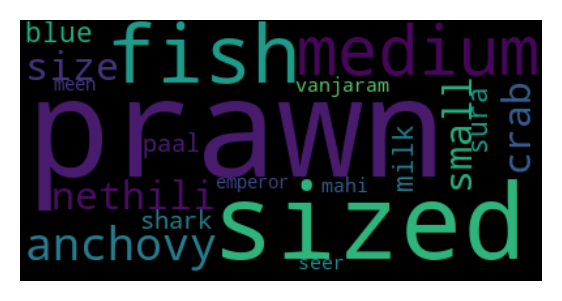

In [517]:
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, max_features=1000)
X = vectorizer.fit_transform(g2['Fish_name'])
kmeans_model = KMeans(n_clusters=1, random_state=0)
kmeans_model.fit(X)

def generate_plot(text, max_words=1000):
    wordcloud = WordCloud(max_words=max_words).generate(text)
    plt.figure(figsize=(3,3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    return ax
# get the clusters centers and order them 
# .argsort()[:, ::-1] line converts each centroid into a sorted
# list of the columns most relevant words 
top_n = 20
print("Top {} terms in cluster".format(top_n))
centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
feature_names = vectorizer.get_feature_names()
terms_vectorize = np.vectorize(lambda x: feature_names[x])
text = " ".join(word for word in terms_vectorize(centroids[0, :top_n]))
generate_plot(text, 100)
plt.show()

# Active Customers

In [526]:
active_customers

Email  Amount  Frequency  Recency  \
0     '+919176655042@freshkatch.myshopify.com     825          2      107   
4     '+919884400714@freshkatch.myshopify.com     330          1      111   
5     '+919987400070@freshkatch.myshopify.com    1230          3      106   
10                           98josh@gmail.com    1100          2       64   
22                     Sindhu.aries@gmail.com     680          3        0   
...                                       ...     ...        ...      ...   
1313       writetosaravananramkumar@gmail.com     299          1      104   
1314          www.vasukisureshkumar@gmail.com     375          1        0   
1316                yalinisenthil02@gmail.com     535          2        5   
1318                    yemkarthikk@yahoo.com     480          1       95   
1319                    yogaraj1111@gmail.com    1210          3       36   

      Amount_cluster  Frequency_cluster  Recency_cluster  
0                  0                  0                0  
4                  0                  0                0  
5                  0                  0                0  
10                 0                  0                0  
22                 0                  0                0  
...              ...                ...              ...  
1313               0                  0                0  
1314               0                  0                0  
1316               0                  0                0  
1318               0                  0                0  
1319               0                  0                0  

[352 rows x 7 columns]

In [552]:
# active_customers.to_excel("active_customers.xlsx")

In [524]:
g3=pd.merge(active_customers['Email'],order[['Email','Fish_name']],on='Email',how='inner')
g3

Email  \
0     '+919176655042@freshkatch.myshopify.com   
1     '+919176655042@freshkatch.myshopify.com   
2     '+919884400714@freshkatch.myshopify.com   
3     '+919987400070@freshkatch.myshopify.com   
4     '+919987400070@freshkatch.myshopify.com   
...                                       ...   
1336                yalinisenthil02@gmail.com   
1337                    yemkarthikk@yahoo.com   
1338                    yogaraj1111@gmail.com   
1339                    yogaraj1111@gmail.com   
1340                    yogaraj1111@gmail.com   

                                 Fish_name  
0         Black Pomfret (Big Size) | Vaval  
1                                Blue Crab  
2                        Sardine (Chaalai)  
3       Seer Fish (Small Size ) | Vanjaram  
4                    Red Snapper | Seppili  
...                                    ...  
1336                    Small Sized Prawns  
1337                     Sardine (Chaalai)  
1338                    Small Sized Prawns  
1339                       Squid | Kanavai  
1340  Emperor Fish (Big Size) | Vilai Meen  

[1341 rows x 2 columns]

Top 20 terms in cluster


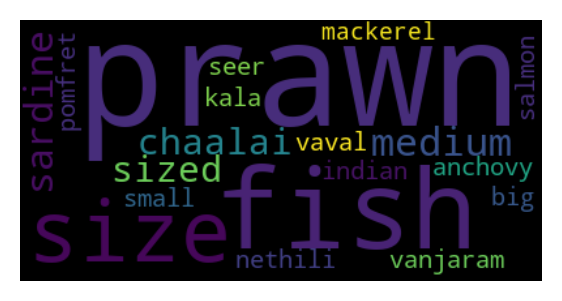

In [525]:
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, max_features=1000)
X = vectorizer.fit_transform(g3['Fish_name'])
kmeans_model = KMeans(n_clusters=1, random_state=0)
kmeans_model.fit(X)

def generate_plot(text, max_words=1000):
    wordcloud = WordCloud(max_words=max_words).generate(text)
    plt.figure(figsize=(3,3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    return ax
# get the clusters centers and order them 
# .argsort()[:, ::-1] line converts each centroid into a sorted
# list of the columns most relevant words 
top_n = 20
print("Top {} terms in cluster".format(top_n))
centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
feature_names = vectorizer.get_feature_names()
terms_vectorize = np.vectorize(lambda x: feature_names[x])
text = " ".join(word for word in terms_vectorize(centroids[0, :top_n]))
generate_plot(text, 100)
plt.show()

# About to Churn loyalist

In [527]:
about_to_churn_loyalist

Email  Amount  Frequency  Recency  Amount_cluster  \
33   abhinayakishore23@gmail.com    9750         24      139               1   
134        arun6633.sk@gmail.com    9330         25      126               1   
215             bshk16@gmail.com   10400         24      116               1   
707      navinmurali28@gmail.com    9737         27      165               1   
935   s.p.premmohana97@gmail.com    9715         22      138               1   

     Frequency_cluster  Recency_cluster  
33                   2                1  
134                  2                1  
215                  2                1  
707                  2                1  
935                  2                1

In [553]:
# about_to_churn_loyalist.to_excel("about_to_churn_loyalist.xlsx")

In [528]:
g4=pd.merge(about_to_churn_loyalist['Email'],order[['Email','Fish_name']],on='Email',how='inner')
g4

Email                                Fish_name
0    abhinayakishore23@gmail.com                    Red Snapper | Seppili
1    abhinayakishore23@gmail.com  Emperor Fish (Medium Size) | Vilai Meen
2    abhinayakishore23@gmail.com  Emperor Fish (Medium Size) | Vilai Meen
3    abhinayakishore23@gmail.com       Seer Fish (Small Size ) | Vanjaram
4    abhinayakishore23@gmail.com     Emperor Fish (Big Size) | Vilai Meen
..                           ...                                      ...
117   s.p.premmohana97@gmail.com       Seer Fish (Small Size ) | Vanjaram
118   s.p.premmohana97@gmail.com     Emperor Fish (Big Size) | Vilai Meen
119   s.p.premmohana97@gmail.com                       Medium Sized Prawn
120   s.p.premmohana97@gmail.com     Silver Pomfret (Medium Size) | Vaval
121   s.p.premmohana97@gmail.com              Seer Fish Slices | Vanjaram

[122 rows x 2 columns]

Top 20 terms in cluster


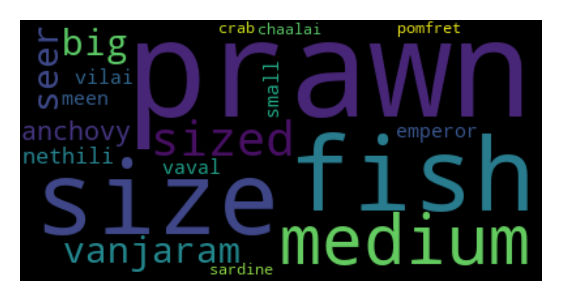

In [529]:
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, max_features=1000)
X = vectorizer.fit_transform(g4['Fish_name'])
kmeans_model = KMeans(n_clusters=1, random_state=0)
kmeans_model.fit(X)

def generate_plot(text, max_words=1000):
    wordcloud = WordCloud(max_words=max_words).generate(text)
    plt.figure(figsize=(3,3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    return ax
# get the clusters centers and order them 
# .argsort()[:, ::-1] line converts each centroid into a sorted
# list of the columns most relevant words 
top_n = 20
print("Top {} terms in cluster".format(top_n))
centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
feature_names = vectorizer.get_feature_names()
terms_vectorize = np.vectorize(lambda x: feature_names[x])
text = " ".join(word for word in terms_vectorize(centroids[0, :top_n]))
generate_plot(text, 100)
plt.show()

# Loyal Customer

In [548]:
loyal_customer

Email  Amount  Frequency  Recency  \
181       balajisayshello@gmail.com    9270         21      131   
306              drksderm@gmail.com    8415         15      114   
334           eugenealexj@gmail.com    8330         17      123   
413             honeypav1@gmail.com    7164         15      132   
467              johnmelt@gmail.com    6385         14      208   
729             nskpillai@gmail.com    7075         13      156   
749         paulkodiyan@hotmail.com    6535         15      157   
773          prabhakhar75@gmail.com    6844         15      143   
791   prathabanpackiamani@gmail.com    8100         16      224   
811       priyaprasad2510@gmail.com    8355         13      123   
941         sabarishree10@gmail.com    6215         16      215   
1120      sreeramsingaram@gmail.com    9300         12      155   
1128            sriniaabs@gmail.com    8675         14      174   

      Amount_cluster  Frequency_cluster  Recency_cluster  
181                1                  1                1  
306                1                  1                1  
334                1                  1                1  
413                1                  1                1  
467                1                  1                1  
729                1                  1                1  
749                1                  1                1  
773                1                  1                1  
791                1                  1                1  
811                1                  1                1  
941                1                  1                1  
1120               1                  1                1  
1128               1                  1                1

In [554]:
# loyal_customer.to_excel("loyal_customer.xlsx")

In [545]:
g5=pd.merge(loyal_customer['Email'],order[['Email','Fish_name']],on='Email',how='inner')
g5

Email                             Fish_name
0    balajisayshello@gmail.com                             Blue Crab
1    balajisayshello@gmail.com      Trevally (Medium Size ) | Paarai
2    balajisayshello@gmail.com                    Medium Sized Prawn
3    balajisayshello@gmail.com   Black Pomfret (Medium Size) | Vaval
4    balajisayshello@gmail.com                     Sardine (Chaalai)
..                         ...                                   ...
191        sriniaabs@gmail.com  Silver Pomfret (Medium Size) | Vaval
192        sriniaabs@gmail.com                    Small Sized Prawns
193        sriniaabs@gmail.com                             Blue Crab
194        sriniaabs@gmail.com           Seer Fish Slices | Vanjaram
195        sriniaabs@gmail.com                    Small Sized Prawns

[196 rows x 2 columns]

Top 20 terms in cluster


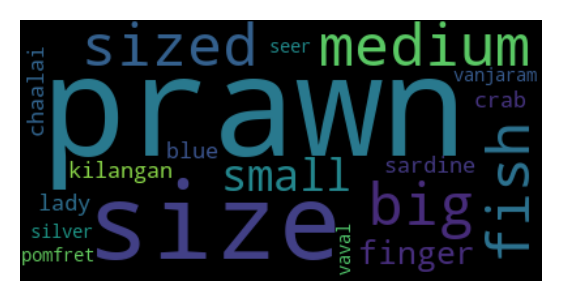

In [546]:
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, max_features=1000)
X = vectorizer.fit_transform(g5['Fish_name'])
kmeans_model = KMeans(n_clusters=1, random_state=0)
kmeans_model.fit(X)

def generate_plot(text, max_words=1000):
    wordcloud = WordCloud(max_words=max_words).generate(text)
    plt.figure(figsize=(3,3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    return ax
# get the clusters centers and order them 
# .argsort()[:, ::-1] line converts each centroid into a sorted
# list of the columns most relevant words 
top_n = 20
print("Top {} terms in cluster".format(top_n))
centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
feature_names = vectorizer.get_feature_names()
terms_vectorize = np.vectorize(lambda x: feature_names[x])
text = " ".join(word for word in terms_vectorize(centroids[0, :top_n]))
generate_plot(text, 100)
plt.show()